<a href="https://colab.research.google.com/github/AdrianaLegalReis/Cartola_MVP/blob/main/MVP_Cartola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint I - Análise de Dados e Boas Práticas

## Adriana Legal Reis

### MVP de Previsão de Resultados dos jogos do Campeonato Brasileiro de Futebol - Série A

## 1. Definição do Problema

O dataset utilizado neste projeto será o **CartolaFC 2022**, proveniente originalmente dos dados extraídos do **API do CartolaFC** e disponível no Github de henriquepgomide/caRtola. Foram utilizados os dados de pré-processamento (antes de qualquer tratamento) disponíveis no site: https://github.com/henriquepgomide/caRtola/tree/master/data/01_raw/2022

O objetivo desse projeto é verificar a probabilidade de um time vencer uma partida com base na pontuação de seus jogadores no CartolaFC. Esse dataset contém os dados do Cartola com as 38 rodadas do Campeonato Brasileiro da Série A de 2022.

Além desses dados iremos utilizar informações retiradas do site da **CBF - Confederação Brasileira de Futebol** com os resultados dos jogos e informações dos times mandantes (que jogaram em casa) ou visitantes (que jogaram fora de casa). Esses resultados estão disponiveis no site: 
https://www.cbf.com.br/futebol-brasileiro/competicoes/campeonato-brasileiro-serie-a/2022#imt

Como um modelo de aprendizado supervisionado, o dataset apresenta diversos atributos relacionados ao desempenho dos jogadores nas rodadas. Iremos considerar a variável Resultado como uma variável classificatória (Vitória: 1, Empate: 0, Derrota: -1). As variáveis ​​preditoras incluem a pontuação dos times considerando o somatório da pontuação de seus jogadores de acordo com sua posição em campo e se o time jogou como mandante ou como visitante.

Para mais detalhes sobre este dataset, consulte: https://github.com/henriquepgomide/caRtola


**Informações sobre os atributos do Cartola:**
1. **Rodadas** - Número da rodada do campeonato 
2. **Time** - Nome do Clube
3. **Posição** - Posição do Jogador em Campo 
4. **Jogador** - Nome do Jogador 
5. **Pontos** - Pontuação do Jogador por Rodada

**Informações sobre os atributos da CBF:**
1. **Rodadas** - Número da rodada do campeonato 
2. **Time Casa** - Nome do Clube mandante
3. **Time Fora** - Nome do Clube visitante
4. **Resultado Casa** - Resultado do Time Casa (Vitória: 1, Empate: 0, Derrota: -1)

## 2. Carga de Dados

Importação dos pacotes que iremos utilizar no projeto.

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar os arquivos .csv disponíveis online.

In [ ]:
# importações
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

### 2.1 Carga dos dados do CartolaFC

Iremos criar uma lista com as urls dos arquivos csv de cada uma das 38 rodadas do Campeonato Brasileiro de 2022.

In [ ]:
# Carrega arquivo csv usando Pandas

# urls para importação do dataset
urls = [
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-01.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-02.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-03.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-04.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-05.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-06.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-07.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-08.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-09.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-10.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-11.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-12.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-13.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-14.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-15.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-16.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-17.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-18.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-19.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-20.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-21.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-22.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-23.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-24.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-25.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-26.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-27.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-28.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-29.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-30.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-31.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-32.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-33.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-34.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-35.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-36.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-37.csv',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/rodada-38.csv',
]

A seguir iremos importar os dados das 38 rodadas, agrupar no dataset chamado ***dftotal*** e verificar as colunas importadas

In [ ]:
# Importação dos dados

dataframes = []

for url in urls:
    temp_df = pd.read_csv(url, index_col=0)
    dataframes.append(temp_df)

# Agrupando todos os arquivos lidos no dataset
dftotal = pd.concat(dataframes, axis=0).reset_index()

# Verificando as colunas disponíveis no dataset
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       30061 non-null  int64  
 1   atletas.atleta_id                           29250 non-null  float64
 2   atletas.rodada_id                           30061 non-null  int64  
 3   atletas.clube_id                            30061 non-null  int64  
 4   atletas.posicao_id                          30061 non-null  object 
 5   atletas.status_id                           30061 non-null  int64  
 6   atletas.pontos_num                          30061 non-null  float64
 7   atletas.preco_num                           30061 non-null  float64
 8   atletas.variacao_num                        30061 non-null  float64
 9   atletas.media_num                           30061 non-null  float64
 10  atletas.jo

Como visto acima, temos mais de 40 colunas no dataset. Iremos, portanto, selecionar as colunas que manteremos em nosso modelo e que são fundamentais para a predição do resultado esperado, como a pontuação dos jogadores, suas posições em campo e o time a que pertencem. Chamaremos esse dataset de ***dfcartola***

In [ ]:
# Selecionando as colunas que queremos manter no dataset
dfcartola = dftotal [['atletas.rodada_id', 'atletas.posicao_id', 'atletas.clube.id.full.name', 'atletas.apelido', 'atletas.pontos_num' ]]

# Renomeando Colunas
dfcartola = dfcartola.rename(columns={'atletas.rodada_id': 'Rodadas', 'atletas.clube.id.full.name': 'Time', 'atletas.posicao_id': 'Posição', 'atletas.apelido': 'Jogador', 'atletas.pontos_num': 'Pontos'})

#Exibindo o dataset
display(dfcartola)

Rodadas Posição         Time           Jogador  Pontos
0            1     gol  Corinthians            Cássio     0.0
1            1     ata     Flamengo           Gabriel     0.0
2            1     gol    Juventude      Felipe Alves     0.0
3            1     lat   América-MG           Marlon      0.0
4            1     tec       Cuiabá           Pintado     0.0
...        ...     ...          ...               ...     ...
30056       38       4    Juventude           Gehring     0.0
30057       38       2    Juventude          Da Rocha     3.7
30058       38       4        Ceará           Wendell     2.0
30059       38       4        Ceará       Caio Rafael     1.8
30060       38       5        Ceará  Daniel Mazerochi     1.3

[30061 rows x 5 columns]

### 2.2 Carga dos dados da CBF

Mais adiante iremos mesclar esse dataset com o dataset das informações obtidas no site da CBF, onde teremos os dados dos confontos das rodadas e o resultado de cada jogo.

Vamos importar os dados da CBF com o resultado dos 380 jogos do Brasileirão 2022 no dataset chamado ***dfjogos***.

In [ ]:

# Carrega arquivo csv usando Pandas

# Informa a URL de importação do dataset
Url2 = 'https://raw.githubusercontent.com/AdrianaLegalReis/Cartola_MVP/main/Jogos.csv'

# Lê o arquivo utilizando as colunas informadas
dfjogos = pd.read_csv(Url2, delimiter=';')

# Verificando as colunas disponíveis no dataset
dfjogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rodadas         380 non-null    int64 
 1   Time Casa       380 non-null    object
 2   Time Fora       380 non-null    object
 3   Resultado Casa  380 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.0+ KB


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões dos nossos dois datasets, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões dos datasets
print("dfcartola: ", dfcartola.shape , "\ndfjogos: ", dfjogos.shape)

dfcartola:  (30061, 5) 
dfjogos:  (380, 4)


In [ ]:
# Mostra as informações dos datasets
print("dfcartola:\n")
print(dfcartola.info())
print("\ndfjogos:\n")
print(dfjogos.info())

dfcartola:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rodadas  30061 non-null  int64  
 1   Posição  30061 non-null  object 
 2   Time     30061 non-null  object 
 3   Jogador  30061 non-null  object 
 4   Pontos   30061 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB
None

dfjogos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rodadas         380 non-null    int64 
 1   Time Casa       380 non-null    object
 2   Time Fora       380 non-null    object
 3   Resultado Casa  380 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.0+ KB
None


In [ ]:
# Mostra as 10 primeiras linhas do dataset dfcartola
dfcartola.head(10)

Rodadas Posição         Time             Jogador  Pontos
0        1     gol  Corinthians              Cássio     0.0
1        1     ata     Flamengo             Gabriel     0.0
2        1     gol    Juventude        Felipe Alves     0.0
3        1     lat   América-MG             Marlon      0.0
4        1     tec       Cuiabá             Pintado     0.0
5        1     zag    Fortaleza  Marcelo Benevenuto     0.0
6        1     gol   Fluminense               Fábio     0.0
7        1     gol       Santos          João Paulo     0.0
8        1     mei    Palmeiras       Raphael Veiga     0.0
9        1     ata  Atlético-MG                Hulk     0.0

Aqui já podemos verificar que a primeira rodada pode estar com valores zerados no ***dfcartola*** e será necessário tratar esses dados.

In [ ]:
# Mostra as 10 primeiras linhas do dataset dfjogos
dfjogos.head(10)

Rodadas    Time Casa      Time Fora Resultado Casa
0        1   Fluminense         Santos              E
1        1  Atlético-GO       Flamengo              E
2        1    Palmeiras          Ceará              D
3        1     Coritiba          Goiás              V
4        1  Atlético-MG  Internacional              V
5        1     Botafogo    Corinthians              D
6        1    Fortaleza         Cuiabá              D
7        1    São Paulo   Athlético-PR              V
8        1         Avaí     América-MG              V
9        1    Juventude     Bragantino              E

Nessa lista podemos visualizar que o dataset tráz os resultados dos jogos com base nas letras V para Vitória, E para Empate e D para Derrota. Iremos tratar esses dados para utlizar números ao invés de letras.

In [ ]:
# Mostra as 10 últimas linhas do dataset dfcartola
dfcartola.tail(10)

Rodadas Posição         Time           Jogador  Pontos
30051       38       5  Corinthians      Arthur Sousa     0.0
30052       38       2       Cuiabá       Léo Herrero     0.0
30053       38       4   Bragantino              Dija     0.0
30054       38       4  Atlético-MG      Yan Phillipe     0.0
30055       38       5         Avaí         Felipinho     0.0
30056       38       4    Juventude           Gehring     0.0
30057       38       2    Juventude          Da Rocha     3.7
30058       38       4        Ceará           Wendell     2.0
30059       38       4        Ceará       Caio Rafael     1.8
30060       38       5        Ceará  Daniel Mazerochi     1.3

Aqui podemos ver que alguns jogadores possuem valor zero nas suas pontuações. Esses casos podem indicar que o jogador realmente fez pontuação zero na partida, como também que o jogador pode não ter atuado naquele jogo. Teremos que analisar como tratar esses casos.

In [ ]:
# Mostra as 10 últimas linhas do dataset dfjogos
dfjogos.tail(10)

Rodadas      Time Casa    Time Fora Resultado Casa
370       38       Flamengo         Avaí              D
371       38          Goiás    São Paulo              D
372       38         Cuiabá     Coritiba              V
373       38   Athlético-PR     Botafogo              V
374       38          Ceará    Juventude              V
375       38     Bragantino   Fluminense              D
376       38     América-MG  Atlético-GO              E
377       38    Corinthians  Atlético-MG              D
378       38         Santos    Fortaleza              D
379       38  Internacional    Palmeiras              V

Vamos exibir um resumo estatístico do dataset ***dfcartola***.

In [ ]:
# Faz um resumo estatístico do dataset dfcartola (média, desvio padrão, mínimo, máximo e os quartis)
dfcartola.describe()

Rodadas        Pontos
count  30061.000000  30061.000000
mean      19.899405      1.180911
std       10.936075      2.717497
min        1.000000     -6.400000
25%       10.000000      0.000000
50%       20.000000      0.000000
75%       29.000000      1.000000
max       38.000000     33.500000

Podemos verificar no resumo estatístico, que a base possui muitos valores zerados ou próximos a zero, o que pode dificultar as nossas análises. Será necessário fazer um pré-tratamento dos dados para que eles se tornem mais representativos.

Vamos exibir um resumo estatístico do dataset ***dfjogos***

In [ ]:
# Faz um resumo estatístico do dataset dfjogos (média, desvio padrão, mínimo, máximo e os quartis)
dfjogos.describe()

Rodadas
count  380.000000
mean    19.500000
std     10.980313
min      1.000000
25%     10.000000
50%     19.500000
75%     29.000000
max     38.000000

Como não existem campos numéricos no ***dfjogos***, esse resumo estatístico não é aplicável.

#### 3.1.1 Pré-Tratamento dos Dados

Antes de continuarmos com as análises de dados e a estatística descritiva é necessário fazer um tratamento prévio nos datasets. 

A granularidade do dataset ***dfcartola*** é por cada jogador, mas iremos agrupar seus dados por rodada x time x posição. Assim teremos dados cosolidados e mais representativos. 

Ao analisarmos os dados do dataset ***dfcartola*** verificamos que vários jogadores possuem pontuação zero em diversas rodadas e que esse número pode realmente indicar a pontuação do jogador naquela rodada como também pode indicar que o jogador não atuou na partida. Portando, decidimos que iremos agrupar os dados dos jogadores utilizando o critério de soma de suas pontuações e não o critério de média. 

Vejamos no exemplo abaixo. Na Rodada 2 temos cinco laterais listados no time do Flamengo. Entretanto, dois deles estão com valores zero. Assim consideramos que o somatório é a melhor opção, pois indica o total de pontos da posição lateral durante o jogo, não sendo necessário saber se o jogodar atuou ou não na rodada.  




In [ ]:
# Verificando os jogadores das laterais do time do Flamengo na segunda Rodada do Brasileirão 2022

# Filtrar os dados
filtro = (dfcartola["Time"] == "Flamengo") & (dfcartola["Posição"] == "lat") & (dfcartola["Rodadas"] == 2)
dados_filtrados = dfcartola[filtro]

# Exibir os dados filtrados
print(dados_filtrados)

      Rodadas Posição      Time       Jogador  Pontos
835         2     lat  Flamengo  Ayrton Lucas     0.0
1026        2     lat  Flamengo   Matheuzinho     0.0
1228        2     lat  Flamengo       Rodinei     2.2
1231        2     lat  Flamengo          Isla     7.6
1434        2     lat  Flamengo   Filipe Luís     6.4


Mas antes de efetuarmos os agrupamento dos dados vamos analisar as colunas que queremos agrupar e suas informações.

In [ ]:
# Verificando a distribuição do campo Rodadas
print(dfcartola.groupby('Rodadas').size())

Rodadas
1     715
2     744
3     748
4     752
5     758
6     763
7     764
8     764
9     764
10    763
11    763
12    770
13    769
14    773
15    780
16    774
17    784
18    792
19    794
20    800
21    802
22    811
23    811
24    809
25    811
26    810
27    812
28    817
29    819
30    818
31    818
32    823
33    824
34    823
35    827
36    829
37    829
38    834
dtype: int64


Percebemos que existe um crescimento na quantidade de jogadores por rodada durante o campeonato.

In [ ]:
# Verificando a distribuição do campo Time
print(dfcartola.groupby('Time').sum())

               Rodadas   Pontos
Time                           
América-MG       30307  1853.57
Athlético-PR     35920  1879.89
Atlético-GO      26347  1457.31
Atlético-MG      24674  2056.03
Avaí             29988  1305.75
Botafogo         34435  1884.23
Bragantino       29493  1671.98
Ceará            29341  1347.87
Corinthians      30973  1920.62
Coritiba         32499  1732.16
Cuiabá           26814  1464.01
Flamengo         30606  2006.50
Fluminense       29917  2046.99
Fortaleza        25800  1977.04
Goiás            35815  1570.69
Internacional    26597  2165.68
Juventude        30268  1240.46
Palmeiras        29599  2556.84
Santos           28550  1712.65
São Paulo        30253  1649.11


Podemos perceber que todos os times listados possuem pontuações no campeonato.

In [ ]:
# Verificando a distribuição do campo Posição
print(dfcartola.groupby('Posição').size())

Posição
1      1452
2      2046
3      2185
4      4022
5      3089
6       320
ata    4197
gol    1865
lat    2658
mei    5114
tec     436
zag    2677
dtype: int64


Aqui podemos verificar que existe um problema no campo Posição do dataset ***dfcartola***.  Uma parte da base de dados está preenchida com a posição do jogador como um texto e outra parte está com um código numérico. Será necessário tratar essa coluna para termos uma única informação consistente.

Vamos analisar as informações de um único jogador no dataset ***dfcartola***.

In [ ]:
# Fazendo o filtro de um jogador

dfcartola[dfcartola['Jogador'] == 'Cano']

Rodadas Posição        Time Jogador  Pontos
99           1     ata  Fluminense    Cano     0.0
744          2     ata  Fluminense    Cano     1.1
1529         3     ata  Fluminense    Cano     2.5
2295         4     ata  Fluminense    Cano    -0.5
3069         5     ata  Fluminense    Cano     7.5
4041         6     ata  Fluminense    Cano    20.4
5059         7     ata  Fluminense    Cano     0.2
5339         8     ata  Fluminense    Cano     9.0
6089         9     ata  Fluminense    Cano    -0.6
7100        10     ata  Fluminense    Cano    17.0
7620        11     ata  Fluminense    Cano     0.5
8369        12     ata  Fluminense    Cano     2.4
9159        13     ata  Fluminense    Cano     8.3
9871        14     ata  Fluminense    Cano     3.0
10699       15     ata  Fluminense    Cano    16.3
11424       16     ata  Fluminense    Cano    15.7
12293       17     ata  Fluminense    Cano     0.4
12956       18     ata  Fluminense    Cano     9.2
13773       19     ata  Fluminense    Cano    13.0
14623       20     ata  Fluminense    Cano     1.2
15441       21     ata  Fluminense    Cano     9.3
16431       22     ata  Fluminense    Cano     0.5
17122       23       5  Fluminense    Cano     4.1
17916       24       5  Fluminense    Cano     5.6
18725       25       5  Fluminense    Cano    -0.1
19535       26       5  Fluminense    Cano    16.1
20345       27       5  Fluminense    Cano     4.0
21156       28       5  Fluminense    Cano     9.1
21973       29       5  Fluminense    Cano    -0.1
22791       30       5  Fluminense    Cano     9.5
23609       31       5  Fluminense    Cano     4.2
24427       32       5  Fluminense    Cano    12.0
25249       33       5  Fluminense    Cano     4.9
26073       34       5  Fluminense    Cano    22.0
26896       35       5  Fluminense    Cano     0.0
27723       36       5  Fluminense    Cano    33.5
28552       37       5  Fluminense    Cano     9.6
29381       38       5  Fluminense    Cano    13.0

Podemos verificar no quadro acima que o campo Posição possui a informação "*ata*" (atacante) até a rodada 22 e que a partir da rodada 23 foi substituída pelo número 5.

Fazendo essa análise com outros jogadores de outras posições chegamos a seguinte associação:

1 - gol

2 - lat

3 - zag

4 - mei

5 - ata

6 - tec


Agora iremos substituir os valores numéricos pelo texto correspondente no campo Posição no dataset ***dfcartola*** e iremos novamente exibir a distribuição do campo Posição.

In [ ]:
# Tratamento do campo Posição

dfcartola['Posição'] = dfcartola['Posição'].replace(1, 'gol')
dfcartola['Posição'] = dfcartola['Posição'].replace(2, 'lat')
dfcartola['Posição'] = dfcartola['Posição'].replace(3, 'zag')
dfcartola['Posição'] = dfcartola['Posição'].replace(4, 'mei')
dfcartola['Posição'] = dfcartola['Posição'].replace(5, 'ata')
dfcartola['Posição'] = dfcartola['Posição'].replace(6, 'tec')

# Verificano a distribuição do campo Posição
print(dfcartola.groupby('Posição').size())

Posição
ata    7286
gol    3317
lat    4704
mei    9136
tec     756
zag    4862
dtype: int64


##### **- Agrupamento dos Campos**


Agora vamos efetuar o agrupamento pelos campos Rodadas, Time e Posição. Nosso dataset agora será chamado ***dfcartola_grouped***

In [ ]:
# Agrupando os valores por Rodada, Time e Posição

dfcartola_grouped = dfcartola.groupby(['Rodadas', 'Time', 'Posição']).sum().reset_index()

display(dfcartola_grouped)

Rodadas        Time Posição  Pontos
0           1  América-MG     ata    0.00
1           1  América-MG     gol    0.00
2           1  América-MG     lat    0.00
3           1  América-MG     mei    0.00
4           1  América-MG     tec    0.00
...       ...         ...     ...     ...
4551       38   São Paulo     gol    7.00
4552       38   São Paulo     lat   18.40
4553       38   São Paulo     mei   28.50
4554       38   São Paulo     tec    9.03
4555       38   São Paulo     zag   12.70

[4556 rows x 4 columns]

Nosso dataset ***dfcartola_grouped*** contém 4.556 linhas e 4 colunas.

##### **- Criação dos Atributos Previsores**

Nosso próximo passo será criar as colunas com os nossos atributos preditivos.

Iremos transformar as informações das linhas do campo Posição em colunas, utilizando a coluna Pontos como seu valor. Assim essas novas colunas serão as características do nosso modelo. 

Agora nosso dataset será chamado de ***dfcartola_pivot***.

In [ ]:
# Transformando as linhas da coluna Posição em Colunas

dfcartola_pivot = dfcartola_grouped.pivot(index=['Rodadas', 'Time'], columns='Posição', values='Pontos')

display(dfcartola_pivot)

Posição                 ata  gol   lat   mei   tec   zag
Rodadas Time                                            
1       América-MG      0.0  0.0   0.0   0.0  0.00   0.0
        Athlético-PR    0.0  0.0   0.0   0.0  0.00   0.0
        Atlético-GO     0.0  0.0   0.0   0.0  0.00   0.0
        Atlético-MG     0.0  0.0   0.0   0.0  0.00   0.0
        Avaí            0.0  0.0   0.0   0.0  0.00   0.0
...                     ...  ...   ...   ...   ...   ...
38      Internacional  32.4  7.5  10.3  22.7  8.39  19.4
        Juventude      13.3  1.0   9.9   7.1  2.62  -2.5
        Palmeiras       9.2  2.0   4.6   7.3  2.30   2.2
        Santos          2.2  2.0   6.0  18.3  2.73   1.5
        São Paulo      32.7  7.0  18.4  28.5  9.03  12.7

[760 rows x 6 columns]

Temos agora um dataset com 760 linhas, que corresponde a pontuação dos 20 times em cada rodada do campeonato (20 x 38 = 760).

##### **- Combinação dos datasets**

O próximo passo será incluir as informações do dataset ***dfcartola_pivot*** no nosso dataset ***dfjogos***, que possui o resultado de todas as partidas do Campeonato Brasileiro da Série A de 2022.

Vamos verificar novamente as informações do dataset ***dfjogos***

In [ ]:
# Verificando as informações do datset dfjogos

display(dfjogos)

Rodadas      Time Casa      Time Fora Resultado Casa
0          1     Fluminense         Santos              E
1          1    Atlético-GO       Flamengo              E
2          1      Palmeiras          Ceará              D
3          1       Coritiba          Goiás              V
4          1    Atlético-MG  Internacional              V
..       ...            ...            ...            ...
375       38     Bragantino     Fluminense              D
376       38     América-MG    Atlético-GO              E
377       38    Corinthians    Atlético-MG              D
378       38         Santos      Fortaleza              D
379       38  Internacional      Palmeiras              V

[380 rows x 4 columns]

Primeiramente vamos levar os dados referentes aos times do campo Time Casa. Para isso vamos renomear a coluna Time Casa para Time.

In [ ]:
# Renomeando a Coluna Time Casa Para Time

dfjogos = dfjogos.rename(columns={'Time Casa': 'Time'})

# Verificando as informações do dataset
display(dfjogos)

Rodadas           Time      Time Fora Resultado Casa
0          1     Fluminense         Santos              E
1          1    Atlético-GO       Flamengo              E
2          1      Palmeiras          Ceará              D
3          1       Coritiba          Goiás              V
4          1    Atlético-MG  Internacional              V
..       ...            ...            ...            ...
375       38     Bragantino     Fluminense              D
376       38     América-MG    Atlético-GO              E
377       38    Corinthians    Atlético-MG              D
378       38         Santos      Fortaleza              D
379       38  Internacional      Palmeiras              V

[380 rows x 4 columns]

Vamos incluir as informações do datset ***dfcartola_pivot*** no dataset ***dfjogos*** considerando as colunas Rodadas e Time como colunas de referência. Em seguida exibiremos as informações do dataset ***dfjogos***.

In [ ]:
# Mesclando as informações do dataset df_pivot com o dataset dfjogos
dfjogos = pd.merge(dfjogos, dfcartola_pivot, on=['Rodadas', 'Time'])

# Verificando as informações do dataset
display(dfjogos)

Rodadas           Time      Time Fora Resultado Casa   ata  gol   lat  \
0          1     Fluminense         Santos              E   0.0  0.0   0.0   
1          1    Atlético-GO       Flamengo              E   0.0  0.0   0.0   
2          1      Palmeiras          Ceará              D   0.0  0.0   0.0   
3          1       Coritiba          Goiás              V   0.0  0.0   0.0   
4          1    Atlético-MG  Internacional              V   0.0  0.0   0.0   
..       ...            ...            ...            ...   ...  ...   ...   
375       38     Bragantino     Fluminense              D   4.4  2.0   0.7   
376       38     América-MG    Atlético-GO              E  18.5  0.0   1.7   
377       38    Corinthians    Atlético-MG              D   9.2  5.0   4.2   
378       38         Santos      Fortaleza              D   2.2  2.0   6.0   
379       38  Internacional      Palmeiras              V  32.4  7.5  10.3   

      mei   tec   zag  
0     0.0  0.00   0.0  
1     0.0  0.00   0.0  
2     0.0  0.00   0.0  
3     0.0  0.00   0.0  
4     0.0  0.00   0.0  
..    ...   ...   ...  
375  13.3  2.63   8.5  
376  13.9  3.56   5.1  
377  11.9  3.51   8.3  
378  18.3  2.73   1.5  
379  22.7  8.39  19.4  

[380 rows x 10 columns]

Vamos renomer as colunas das nossas variáveis para indicar que são os dados refentes ao Time Casa. Para isso colocaremos o texto "Casa" no final do nome de cada Coluna.

Iremos também renomear o campo Time Fora para Time, para que possamos trazer para o nosso dataset os dados dos jogadores dos times visitantes.

In [ ]:
# Renomeando as Colunas do Time da Casa

dfjogos = dfjogos.rename(columns={'Time': 'Time Casa'})
dfjogos = dfjogos.rename(columns={'gol': 'gol casa'})
dfjogos = dfjogos.rename(columns={'lat': 'lat casa'})
dfjogos = dfjogos.rename(columns={'zag': 'zag casa'})
dfjogos = dfjogos.rename(columns={'mei': 'mei casa'})
dfjogos = dfjogos.rename(columns={'ata': 'ata casa'})
dfjogos = dfjogos.rename(columns={'tec': 'tec casa'})

# Renomeando a Coluna Time Fora Para Time
dfjogos = dfjogos.rename(columns={'Time Fora': 'Time'})

# Verificando as informações do dataset
display(dfjogos)

Rodadas      Time Casa           Time Resultado Casa  ata casa  gol casa  \
0          1     Fluminense         Santos              E       0.0       0.0   
1          1    Atlético-GO       Flamengo              E       0.0       0.0   
2          1      Palmeiras          Ceará              D       0.0       0.0   
3          1       Coritiba          Goiás              V       0.0       0.0   
4          1    Atlético-MG  Internacional              V       0.0       0.0   
..       ...            ...            ...            ...       ...       ...   
375       38     Bragantino     Fluminense              D       4.4       2.0   
376       38     América-MG    Atlético-GO              E      18.5       0.0   
377       38    Corinthians    Atlético-MG              D       9.2       5.0   
378       38         Santos      Fortaleza              D       2.2       2.0   
379       38  Internacional      Palmeiras              V      32.4       7.5   

     lat casa  mei casa  tec casa  zag casa  
0         0.0       0.0      0.00       0.0  
1         0.0       0.0      0.00       0.0  
2         0.0       0.0      0.00       0.0  
3         0.0       0.0      0.00       0.0  
4         0.0       0.0      0.00       0.0  
..        ...       ...       ...       ...  
375       0.7      13.3      2.63       8.5  
376       1.7      13.9      3.56       5.1  
377       4.2      11.9      3.51       8.3  
378       6.0      18.3      2.73       1.5  
379      10.3      22.7      8.39      19.4  

[380 rows x 10 columns]

Em seguida, vamos incluir as informações do datset ***dfcartola_pivot*** referentes aos times visitantes no dataset ***dfjogos*** considerando as colunas Rodadas e Time como colunas de referência, e iremos exibir as informações do dataset ***dfjogos***.

In [ ]:
# Mesclando as informações do dataset df_pivot com o dataset dfjogos para o Time Fora
dfjogos = pd.merge(dfjogos, dfcartola_pivot, on=['Rodadas', 'Time'])

# Verificando as informações do dataset
display(dfjogos)

Rodadas      Time Casa           Time Resultado Casa  ata casa  gol casa  \
0          1     Fluminense         Santos              E       0.0       0.0   
1          1    Atlético-GO       Flamengo              E       0.0       0.0   
2          1      Palmeiras          Ceará              D       0.0       0.0   
3          1       Coritiba          Goiás              V       0.0       0.0   
4          1    Atlético-MG  Internacional              V       0.0       0.0   
..       ...            ...            ...            ...       ...       ...   
375       38     Bragantino     Fluminense              D       4.4       2.0   
376       38     América-MG    Atlético-GO              E      18.5       0.0   
377       38    Corinthians    Atlético-MG              D       9.2       5.0   
378       38         Santos      Fortaleza              D       2.2       2.0   
379       38  Internacional      Palmeiras              V      32.4       7.5   

     lat casa  mei casa  tec casa  zag casa   ata  gol   lat   mei   tec   zag  
0         0.0       0.0      0.00       0.0   0.0  0.0   0.0   0.0  0.00   0.0  
1         0.0       0.0      0.00       0.0   0.0  0.0   0.0   0.0  0.00   0.0  
2         0.0       0.0      0.00       0.0   0.0  0.0   0.0   0.0  0.00   0.0  
3         0.0       0.0      0.00       0.0   0.0  0.0   0.0   0.0  0.00   0.0  
4         0.0       0.0      0.00       0.0   0.0  0.0   0.0   0.0  0.00   0.0  
..        ...       ...       ...       ...   ...  ...   ...   ...   ...   ...  
375       0.7      13.3      2.63       8.5  14.4  9.5   5.7  11.2  5.37  18.3  
376       1.7      13.9      3.56       5.1   4.8  7.0  14.6  -1.1  2.55   2.8  
377       4.2      11.9      3.51       8.3  12.7  8.0  17.5  13.2  5.83  12.7  
378       6.0      18.3      2.73       1.5  28.7  8.0  28.3  10.4  7.31   5.0  
379      10.3      22.7      8.39      19.4   9.2  2.0   4.6   7.3  2.30   2.2  

[380 rows x 16 columns]

Novamente vamos renomer as colunas das nossas variáveis para indicar que são os dados refentes ao Time Fora. Para isso colocaremos o texto "Fora" ao final do nome de cada Coluna.

In [ ]:
# Renomeando as Colunas do Time da Fora

dfjogos = dfjogos.rename(columns={'Time': 'Time Fora'})
dfjogos = dfjogos.rename(columns={'gol': 'gol fora'})
dfjogos = dfjogos.rename(columns={'lat': 'lat fora'})
dfjogos = dfjogos.rename(columns={'zag': 'zag fora'})
dfjogos = dfjogos.rename(columns={'mei': 'mei fora'})
dfjogos = dfjogos.rename(columns={'ata': 'ata fora'})
dfjogos = dfjogos.rename(columns={'tec': 'tec fora'})

# Verificando as informações do dataset
display(dfjogos)

Rodadas      Time Casa      Time Fora Resultado Casa  ata casa  gol casa  \
0          1     Fluminense         Santos              E       0.0       0.0   
1          1    Atlético-GO       Flamengo              E       0.0       0.0   
2          1      Palmeiras          Ceará              D       0.0       0.0   
3          1       Coritiba          Goiás              V       0.0       0.0   
4          1    Atlético-MG  Internacional              V       0.0       0.0   
..       ...            ...            ...            ...       ...       ...   
375       38     Bragantino     Fluminense              D       4.4       2.0   
376       38     América-MG    Atlético-GO              E      18.5       0.0   
377       38    Corinthians    Atlético-MG              D       9.2       5.0   
378       38         Santos      Fortaleza              D       2.2       2.0   
379       38  Internacional      Palmeiras              V      32.4       7.5   

     lat casa  mei casa  tec casa  zag casa  ata fora  gol fora  lat fora  \
0         0.0       0.0      0.00       0.0       0.0       0.0       0.0   
1         0.0       0.0      0.00       0.0       0.0       0.0       0.0   
2         0.0       0.0      0.00       0.0       0.0       0.0       0.0   
3         0.0       0.0      0.00       0.0       0.0       0.0       0.0   
4         0.0       0.0      0.00       0.0       0.0       0.0       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
375       0.7      13.3      2.63       8.5      14.4       9.5       5.7   
376       1.7      13.9      3.56       5.1       4.8       7.0      14.6   
377       4.2      11.9      3.51       8.3      12.7       8.0      17.5   
378       6.0      18.3      2.73       1.5      28.7       8.0      28.3   
379      10.3      22.7      8.39      19.4       9.2       2.0       4.6   

     mei fora  tec fora  zag fora  
0         0.0      0.00       0.0  
1         0.0      0.00       0.0  
2         0.0      0.00       0.0  
3         0.0      0.00       0.0  
4         0.0      0.00       0.0  
..        ...       ...       ...  
375      11.2      5.37      18.3  
376      -1.1      2.55       2.8  
377      13.2      5.83      12.7  
378      10.4      7.31       5.0  
379       7.3      2.30       2.2  

[380 rows x 16 columns]

##### **- Criação do Atributo Alvo**

A resposta que queremos do nosso problema é se o Resultado do jogo será Vitória, Empate ou Derrota. Criaremos a Coluna Resultado, onde o Resultado do time da casa será representado por:

Vitória: 1

Empate: 0

Derrota: -1


In [ ]:
# Criando a Coluna Resultado

# duplica a Resultado Casa e atribui a nova coluna duplicada a Resultado
dfjogos = dfjogos.assign(Resultado=dfjogos['Resultado Casa'])

dfjogos['Resultado'] = dfjogos['Resultado'].replace("V", 1)
dfjogos['Resultado'] = dfjogos['Resultado'].replace("E", 0)
dfjogos['Resultado'] = dfjogos['Resultado'].replace("D", -1)

# Verificano a distribuição do campo Posição
print(dfjogos.groupby('Resultado').size())

Resultado
-1    104
 0    108
 1    168
dtype: int64


Agora vamos exibir um resumo estatístico do dataset ***dfjogos***.

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dfjogos.describe()

Rodadas    ata casa    gol casa    lat casa    mei casa    tec casa  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  379.000000   
mean    19.500000   13.814737    3.560263    9.155000   14.093421    4.302507   
std     10.980313   10.471476    3.725315    8.769761    9.437761    2.425094   
min      1.000000   -2.800000   -3.000000   -2.500000   -1.500000   -0.080000   
25%     10.000000    5.800000    0.000000    2.300000    7.975000    2.600000   
50%     19.500000   12.200000    3.000000    6.050000   12.300000    4.190000   
75%     29.000000   18.525000    7.000000   15.125000   19.800000    5.915000   
max     38.000000   54.200000   15.500000   37.300000   53.000000   11.120000   

         zag casa    ata fora    gol fora    lat fora    mei fora    tec fora  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  377.000000   
mean     7.338947   11.019737    3.339211    6.783158   11.132368    3.361353   
std      7.311873    8.691618    3.895842    7.206489    7.734300    2.044574   
min     -5.800000   -3.500000   -4.000000   -6.600000   -1.500000    0.000000   
25%      1.200000    4.700000    0.000000    1.200000    6.000000    2.110000   
50%      5.100000    9.400000    2.000000    4.350000   10.100000    3.190000   
75%     13.050000   15.625000    6.000000   10.900000   15.600000    4.650000   
max     30.500000   44.300000   19.000000   34.100000   47.800000    9.930000   

         zag fora   Resultado  
count  380.000000  380.000000  
mean     5.556579    0.168421  
std      6.627574    0.830203  
min     -5.300000   -1.000000  
25%      0.500000   -1.000000  
50%      3.550000    0.000000  
75%      9.500000    1.000000  
max     37.700000    1.000000

Podemos verificar que a média de todas as posições casa são maiores que as suas correspondentes posições fora. Isso demonstra que pode existir alguma relação dessas pontuações com os resultados apresentados das partidas, onde temos 168 vitórias (Resultado 1) do time casa contra 104 vitórias (Resultado -1) do time visitante. A pergunta que fica é como o resultado Empate (Resultado 0) se relaciona com esses números.

### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset ***dfjogos***. Mas antes vamos converter o campo Rodadas em um campo texto para que ele não seja considerado como um atributo.

In [ ]:
# converter a coluna "Rodadas" para texto para que  não seja considerada uma variável numérica e exibida nos gráficos
dfjogos['Rodadas'] = dfjogos['Rodadas'].astype(str)

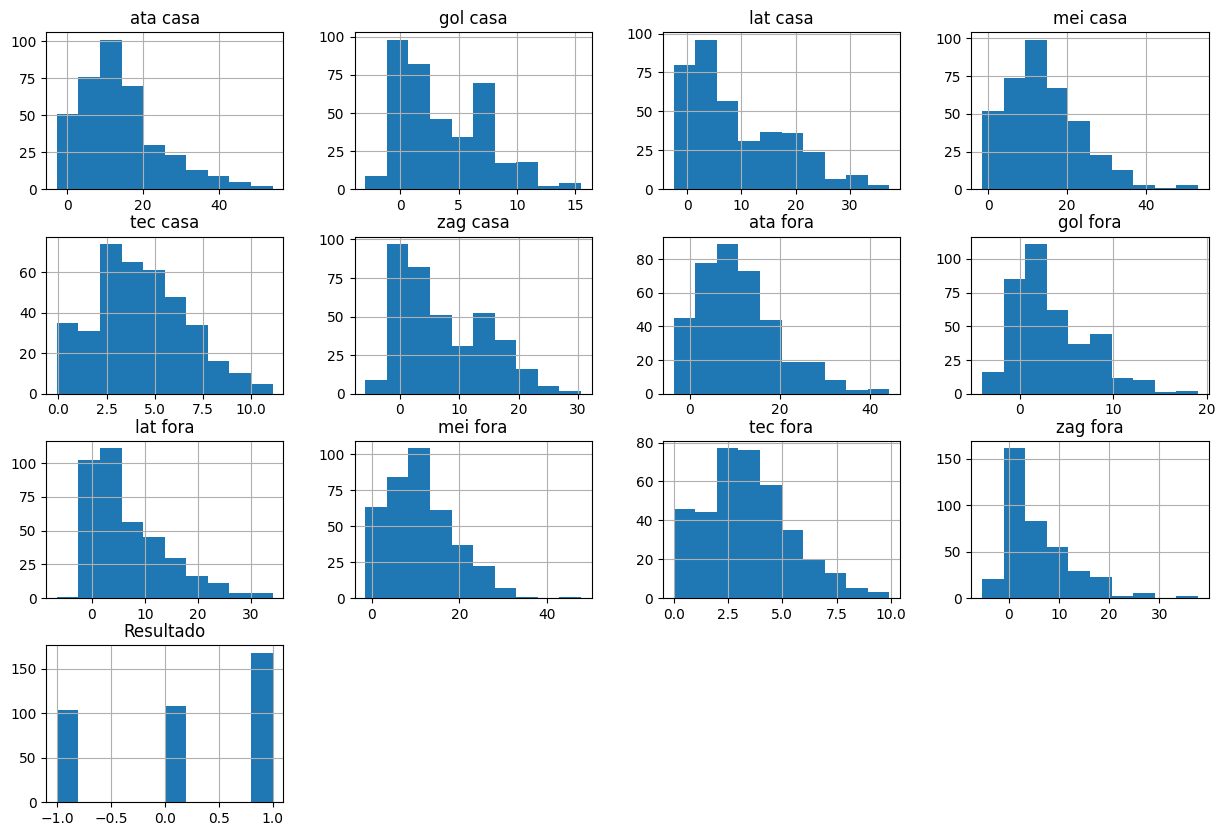

In [ ]:
# Histograma
dfjogos.hist(figsize = (15,10))
plt.show()

Podemos verificar que os atributos lat casa, zag casa, tec casa, gol fora, lat fora, tec fora e zag fora possuem uma distribuição assimétrica a direita. Os atributos ata casa, mei casa e ata fora seguem uma distribuição aproximadamente normal.

Quando comparamos os gráficos das mesmas posições com os times casa e fora, verificamos que os atributos ata, mei e tec possuem distribuições semelhantes. 

Agora vamos verificar os dados com o Gráfico de Densidade, ou Density Plot. Vamos criar um density plot para cada atributo do dataset para visualizar a sua curva de densidade.

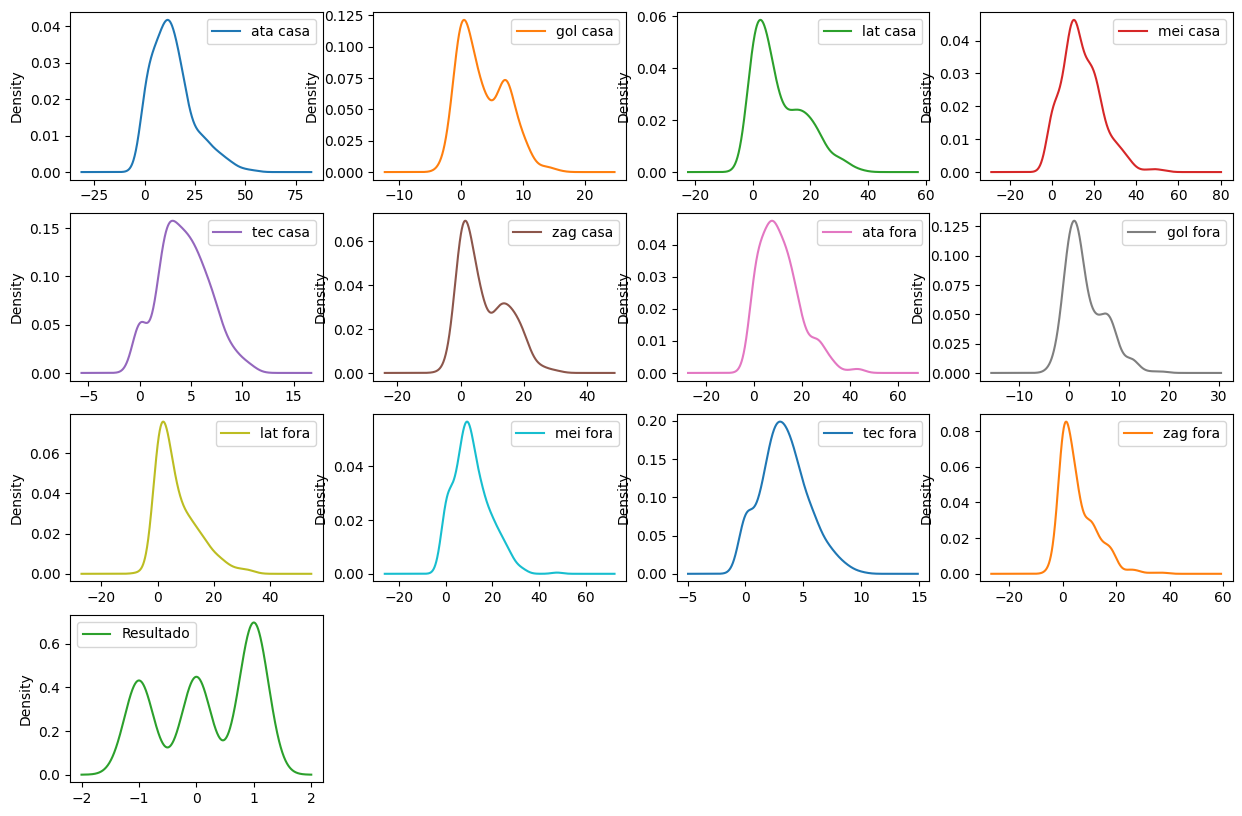

In [ ]:
# Density Plot
dfjogos.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

A curva de densidade nos mostra uma melhor visualização gráfica dos dados, confirmando nossas análises efetuadas com o histograma.

Vamos agora trabalhar com boxplots. 

O objetivo da construção desse gráfico é tornar mais nítida a visualização das estatísticas para fazer análises e processamentos em relação a dispersão, assimetria, média, outliers (mínimos e máximos) e mediana.

No boxplot, a linha no centro (verde) representa o valor da mediana. A linha abaixo é o 1o quartil e a linha acima o terceiro quartil. O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

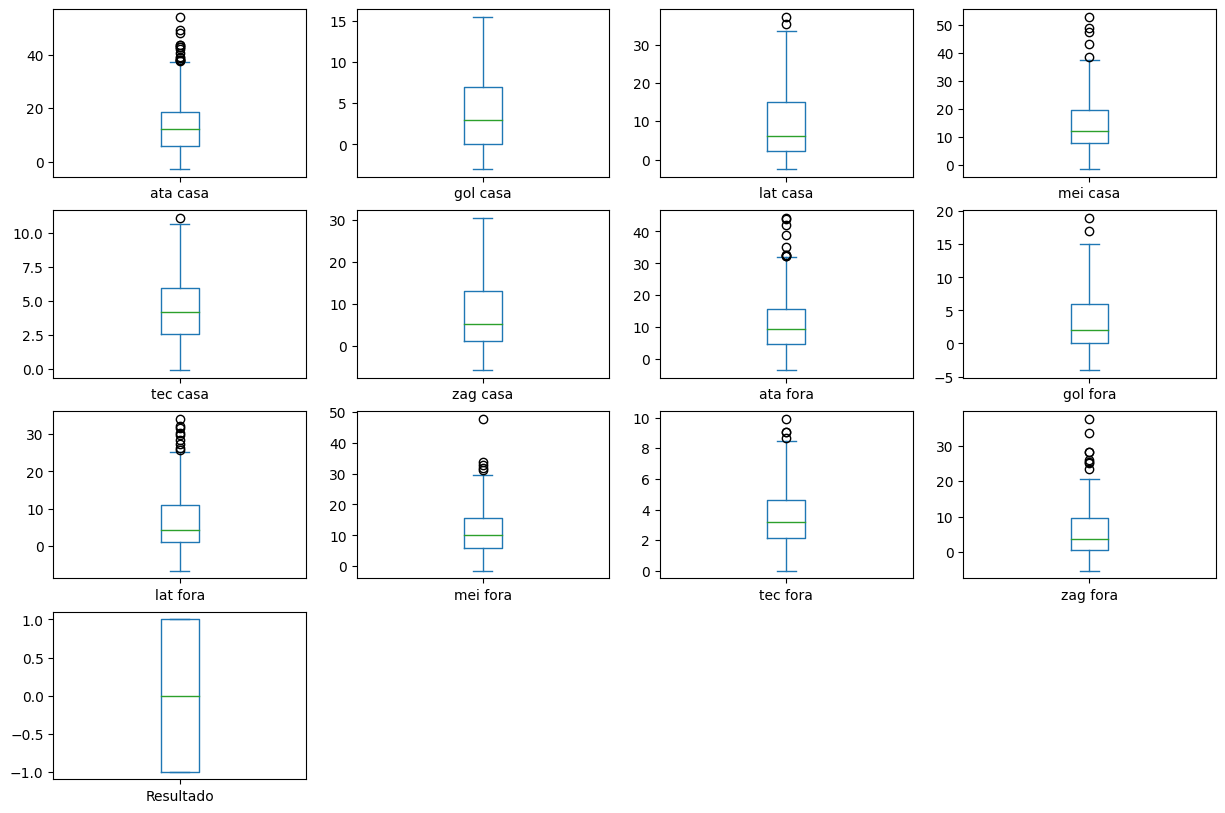

In [ ]:
# Boxplot
dfjogos.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Podemos verificar que as posições ata casa, mei casa, ata fora, lat fora, mei fora e zag fora possuem uma grande quantidade de valores fora do quadro central, o que indica casos de outliers. Entretanto, não consideramos que esses casos necessitem de tratamentos pois são as pontuações efetivamente feitas pelos jogadores nas rodadas.

Além disso, podemos verificar a dispersão dos dados considerando a altura da caixa central, ou seja, a diferença entre o terceiro e o primeiro quartil (que representa 50% dos dados), medida usada para medir a variabilidade sem a influência de outliers

Com esse gráfico também podemos ver com mais facilidade a simetria dos campos. São simétricos quando a linha da mediana fica no centro da caixa. Portanto são simétricas as posições ata casa, tec casa, ata fora, mei fora e o Resultado. As demais posições são assimétricas positivas, pois a mediana está mais perto do primeiro quartil.

### 3.3. Visualizações Multimodais

Complementaremos a nossa análise de dados verificando a associação entre as nossas variáveis, ou seja, o grau de dependência entre elas. Para isso iremos utilizar o coeficiente de correlação de Pearson(ρ), onde:
* ρ próximo de -1 : há uma correlação negativa entre as variáveis, 
* ρ próximo de +1: há uma correlação positiva entre as variáveis, 
* ρ próximo de 0: não há correlação entre as variáveis.

Para visualizarmos a matriz de correlação, vamos utilizar a função .heatmap() do pacote seaborn, essa função vai nos retornar uma forma gráfica da matriz com uma escala de cor em conjunto com uma escala numérica, as quais vão indicar o grau medido entre as variáveis.

<ipython-input-40-8365b70c6031>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfjogos.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);


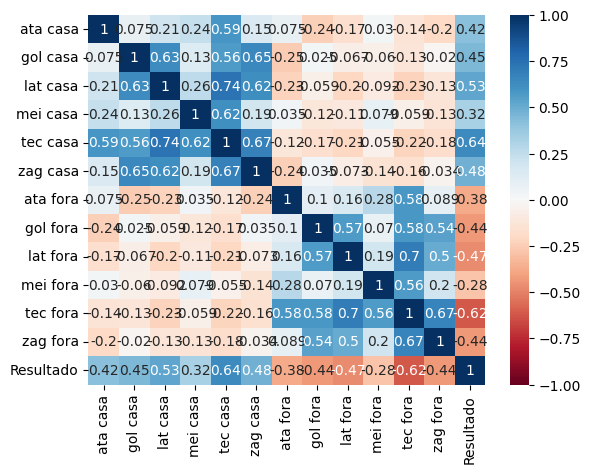

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dfjogos.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Nessa matriz podemos ver uma escala de cores de tonalidades de laranja, vermelho e azul, e uma escala numérica que vai de 1 a -1. O interessante dessa representação gráfica é que além da barra lateral que demonstra a escala numérica do coeficiente e das cores, há também em cada quadrante o valor e a cor referente da relação.

Aqui temos uma visualização bem interessante dos dados. Se olharmos a correlação por bloco de informações separando casa e fora podemos verificar que as posições dentro de cada bloco possuem correlações positivas, enquanto que quando comparamos as informações das posições de um bloco com o outro (casa x fora) temos correlações negativas.  

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

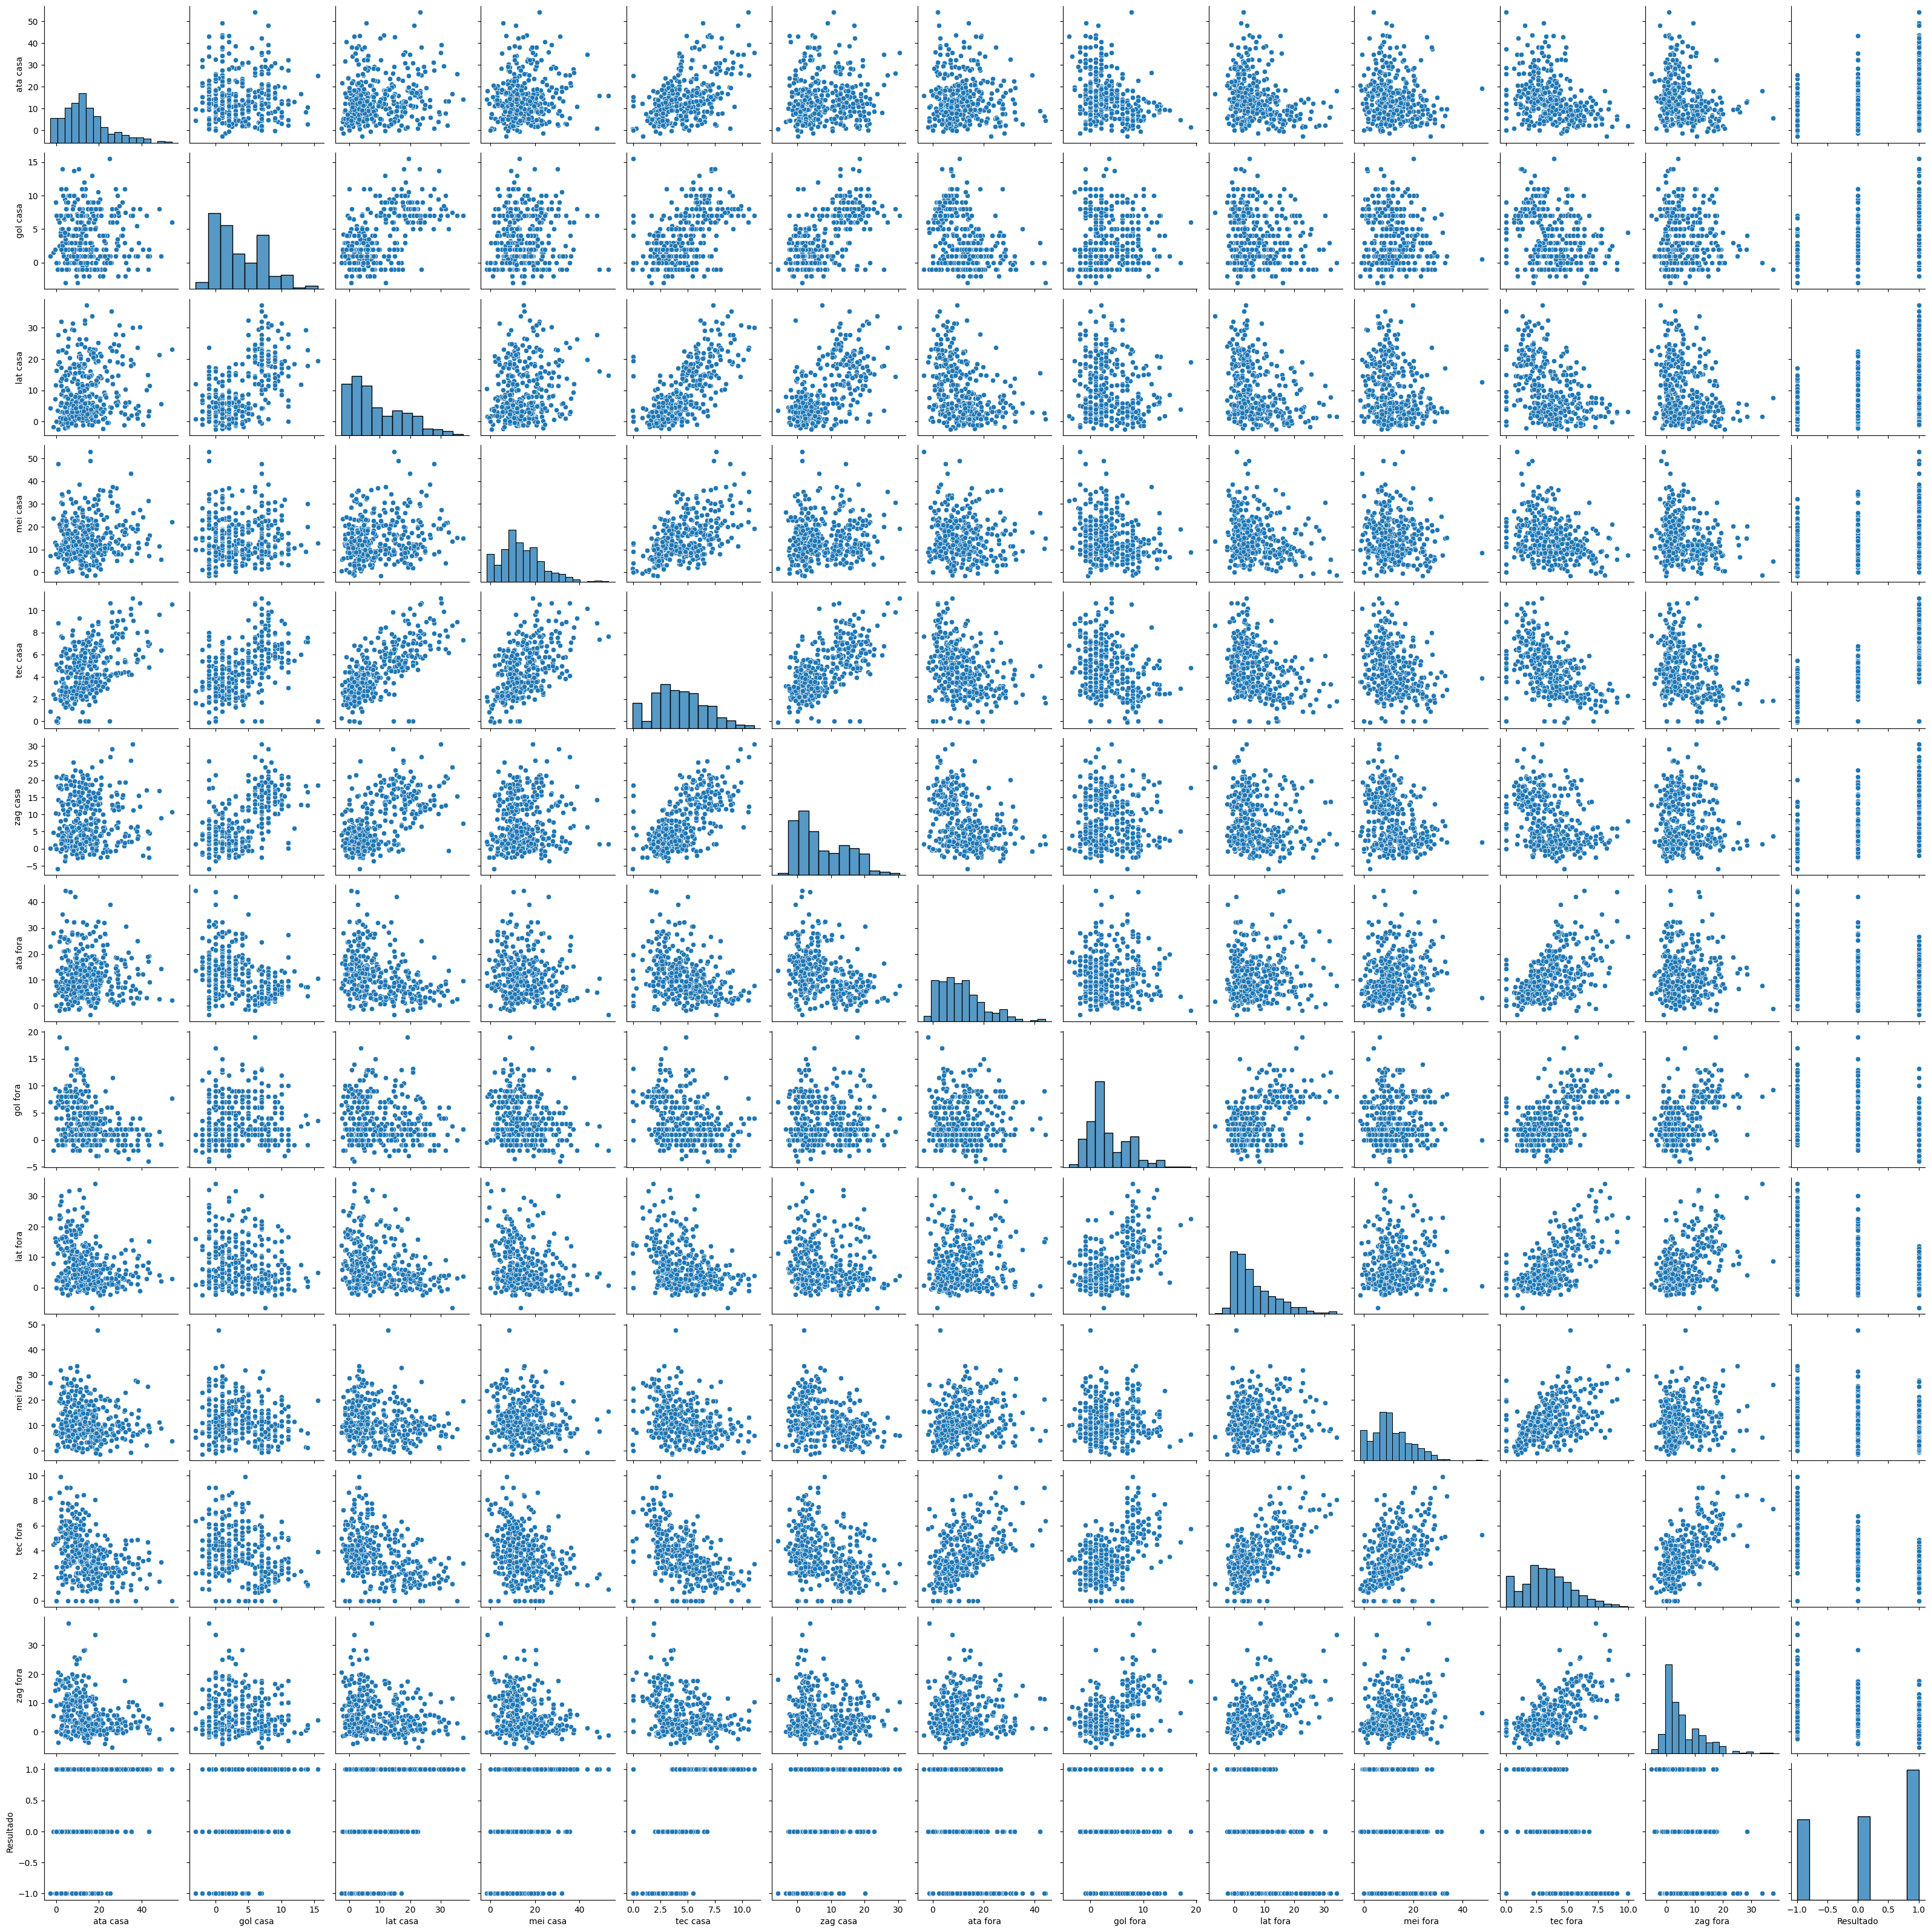

In [ ]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dfjogos)

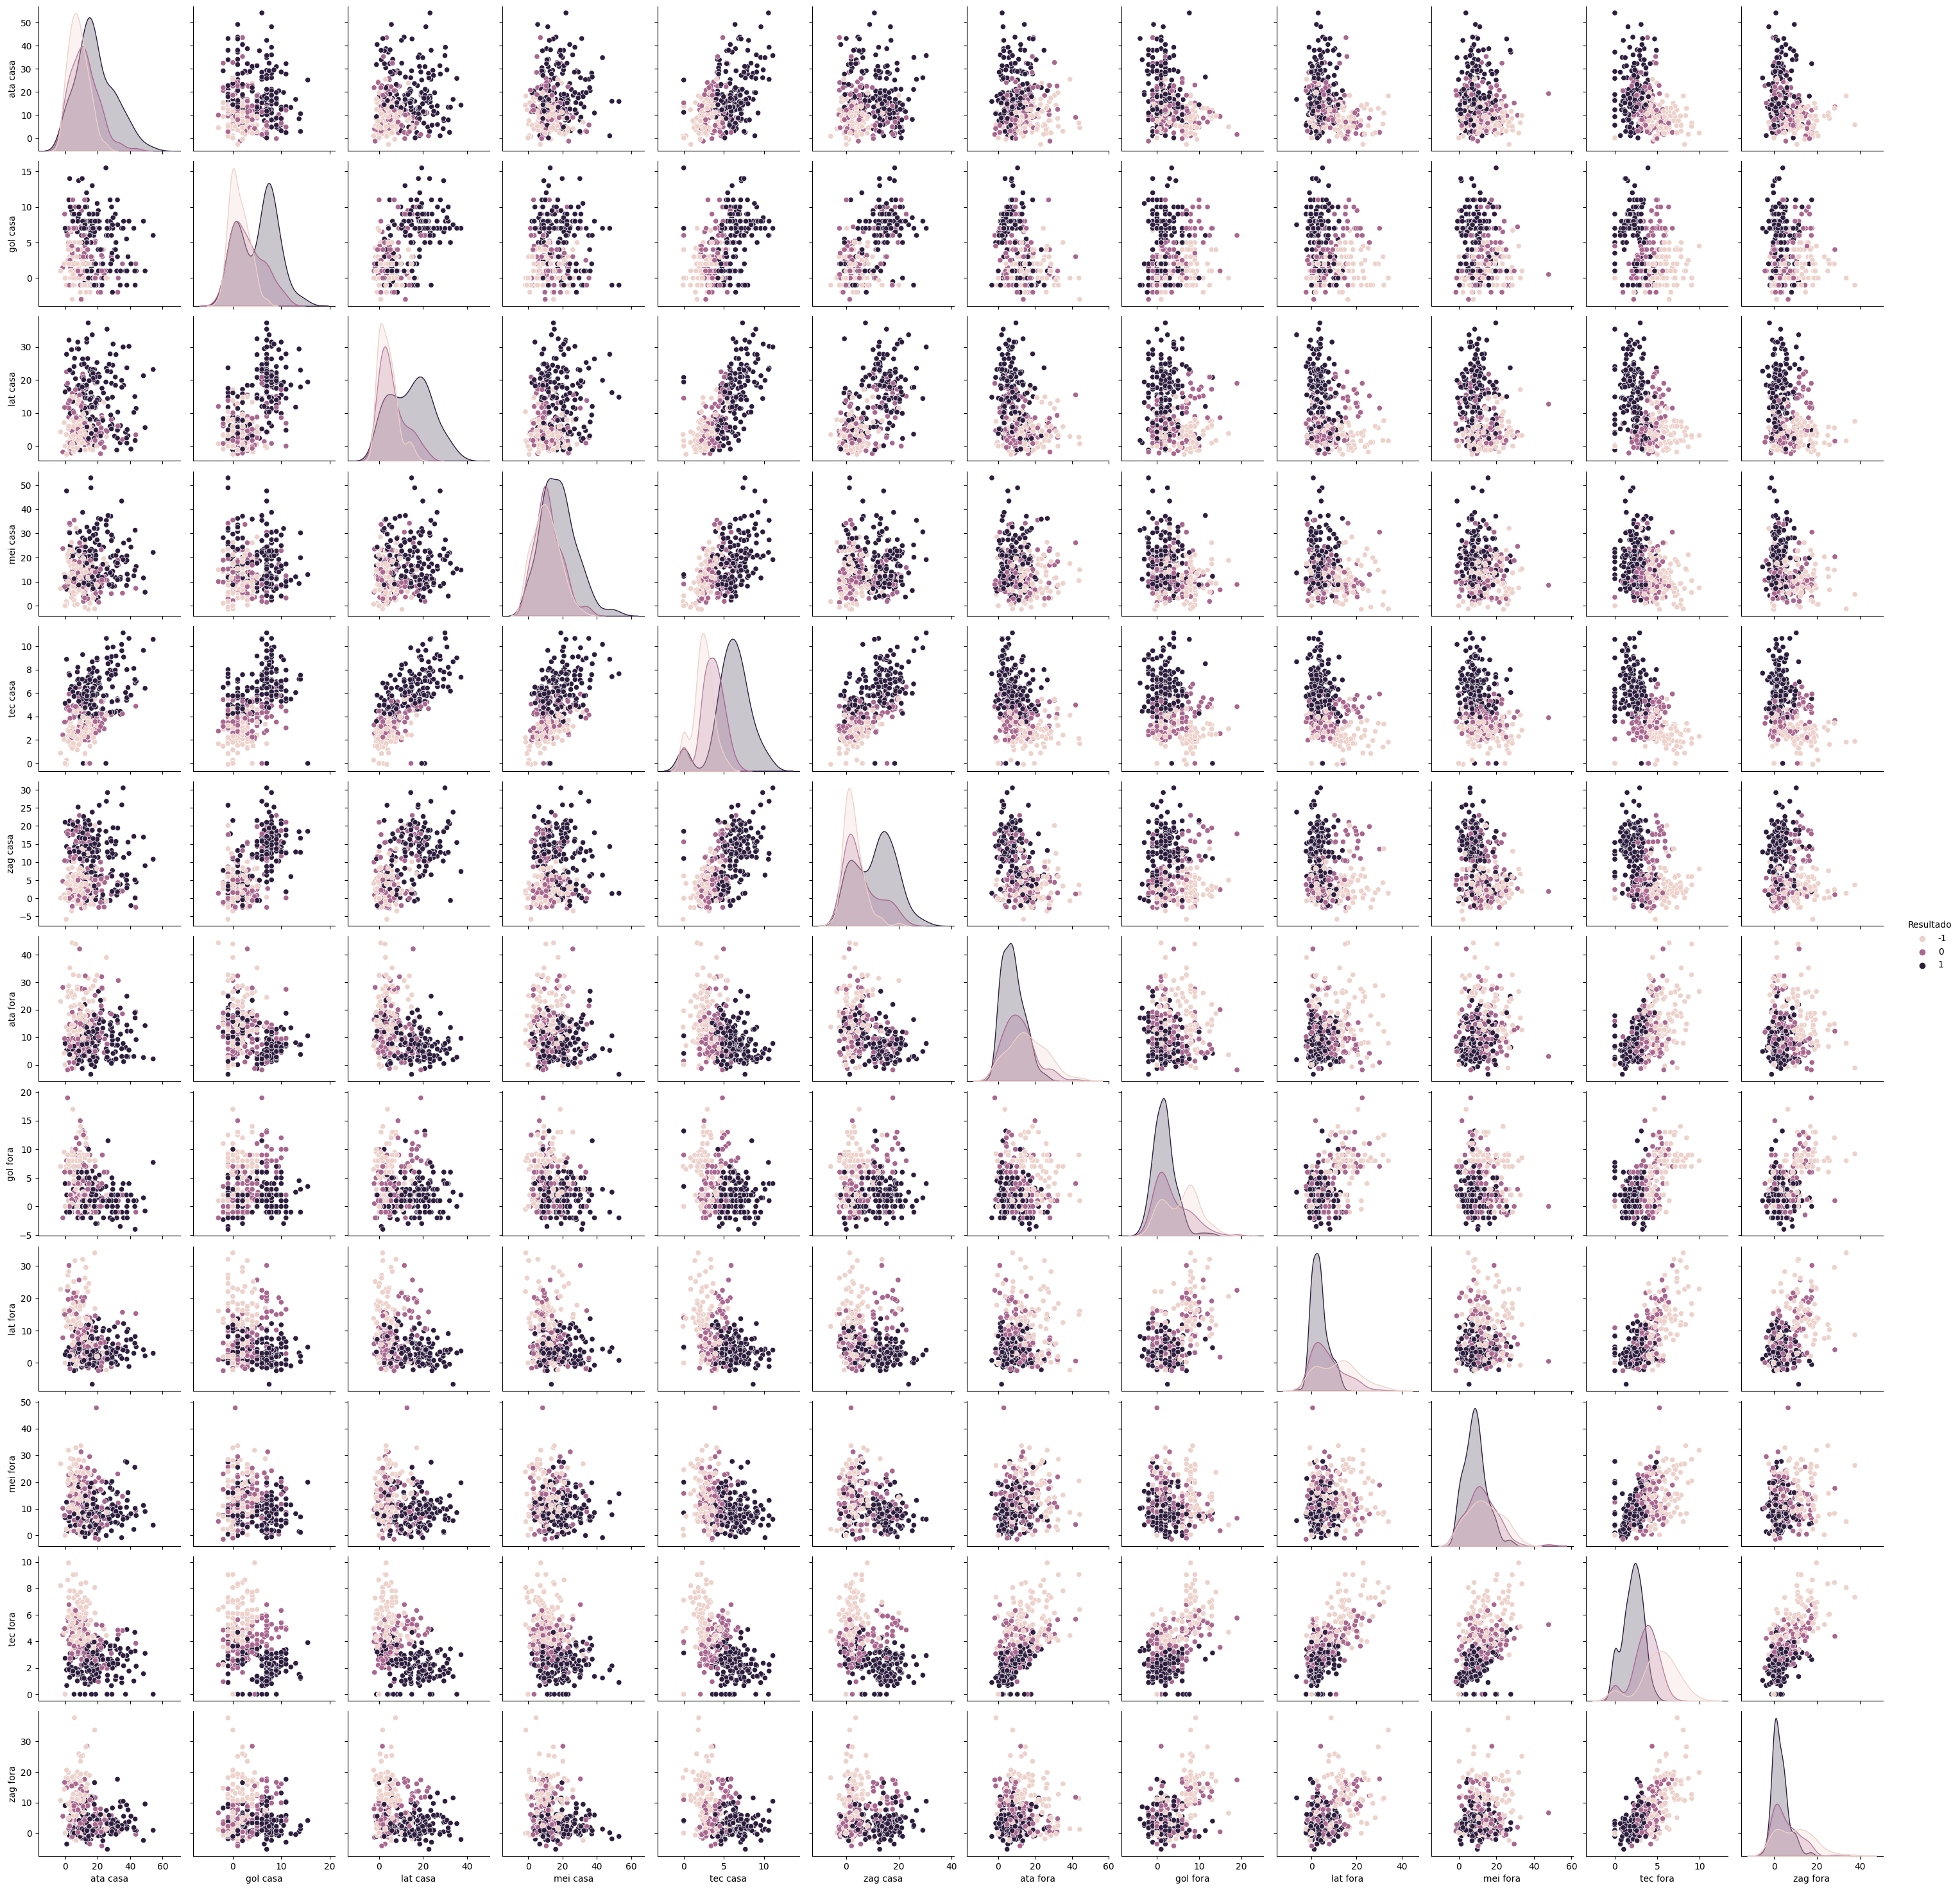

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(dfjogos, hue = "Resultado", height = 2.5);

Analisando esses gráficos confirmamos o insight que tivemos com a matrix de correlação. Quando comparamos a pontuação das posições de diferentes blocos (casa x fora) percebemos que quanto maior a pontuação de um, menor a pontuação do outro. Por exemplo, quanto maior a pontuação ata casa, menor a pontuação gol fora. 

Também podemos ter uma fácil visualização da relação das cores da nossa variável Resultado com relação as pontuações das posições. Quando analisamos o gráfico da posição ata casa vemos que as maiores pontuações estão com a cor azul que é o resultado 1 de vitória do time da casa e quando fazemos essa mesma análise no gráfico ata fora a cor das maiores pontuações é o rosa claro, que é o resultado -1 (derrota do time casa).  

## 4. Pré-Processamento de dados

Nesta etapa iremos realizar o tratamento de valores faltantes (missings) e zerados.

### 4.1. Tratamento de Missings e Limpeza

Primeiramente vamos verificar os valores missing no nosso dataset ***dfjogos***.

#### **4.1.1 Tratamento de NaN**

In [ ]:
# verificando nulls no dataset
dfjogos.isnull().sum()

Rodadas           0
Time Casa         0
Time Fora         0
Resultado Casa    0
ata casa          0
gol casa          0
lat casa          0
mei casa          0
tec casa          1
zag casa          0
ata fora          0
gol fora          0
lat fora          0
mei fora          0
tec fora          3
zag fora          0
Resultado         0
dtype: int64

Conforme o resultado acima verificamos que existem 4 itens sem valores, sendo 1 no campo tec casa e 3 no campo tec fora. Vamos analisar esses casos.

In [ ]:
# exibe as linhas da coluna 'tec casa' que possuem valores nulos
display(dfjogos[dfjogos['tec casa'].isnull()])

Rodadas Time Casa  Time Fora Resultado Casa  ata casa  gol casa  lat casa  \
215      22     Ceará  Fortaleza              D       7.5       4.0       1.6   

     mei casa  tec casa  zag casa  ata fora  gol fora  lat fora  mei fora  \
215      17.0       NaN       6.3      27.5       8.0      21.9      13.8   

     tec fora  zag fora  Resultado  
215      7.48      11.1         -1

Verificamos que o técnico do Ceará foi substituído e por isso não existem dados para essa posição na rodada 22. A pontuação dos técnicos no Cartola FC é a média dos jogadores do time. Portanto, iremos somar o total de pontos das demais posições e dividir por 11, que é a quantidade de jogadores em campo.

Podemos conferir nessa mesma linha que se somarmos as posições do time visitante (fora) e dividirmos por 11, dará exatamente a pontuação do técnico fora.



In [ ]:
# Selecionando as linhas null para tratamento
linha = dfjogos.loc[(dfjogos['Rodadas'] == '22') & (dfjogos['Time Casa'] == 'Ceará')]

# Somando as pontuações dos campos em casa e fora exeto técnico
camposcasa = linha['ata casa'] + linha['gol casa'] + linha['lat casa'] + linha['mei casa'] + linha['zag casa']
camposfora = linha['ata fora'] + linha['gol fora'] + linha['lat fora'] + linha['mei fora'] + linha['zag fora']
njogadores = 11

# # Calculadndo a pontuação do técnico casa e fora
teccasa = round(camposcasa.sum()/njogadores,2)
tecfora = round(camposfora.sum()/njogadores,2)

print("Pontuação calculada do técnico casa: ", teccasa, "\nPontuação calculada do técnico fora: " , tecfora) 

Pontuação calculada do técnico casa:  3.31 
Pontuação calculada do técnico fora:  7.48


Vamos substituir o valor da pontuação do tec casa pelo 3.31 calculado.

In [ ]:
# # Substituindo o valor do campo tec casa pelo valor calculado
filtro = dfjogos.loc[(dfjogos['Rodadas'] == '22') & (dfjogos['Time Casa'] == 'Ceará')]
linha = dfjogos.loc[(dfjogos['Rodadas'] == '22') & (dfjogos['Time Casa'] == 'Ceará')].index[0]
dfjogos.loc[linha, 'tec casa'] = teccasa

display(filtro)

3.31


Rodadas Time Casa  Time Fora Resultado Casa  ata casa  gol casa  lat casa  \
215      22     Ceará  Fortaleza              D       7.5       4.0       1.6   

     mei casa  tec casa  zag casa  ata fora  gol fora  lat fora  mei fora  \
215      17.0      3.31       6.3      27.5       8.0      21.9      13.8   

     tec fora  zag fora  Resultado  
215      7.48      11.1         -1

In [ ]:
# exibe as linhas da coluna 'tec fora' que possuem valores nulos
display(dfjogos[dfjogos['tec fora'].isnull()])

Rodadas    Time Casa  Time Fora Resultado Casa  ata casa  gol casa  \
92       10   América-MG      Ceará              D       3.4       1.0   
93       10   Bragantino   Flamengo              V       8.0       8.5   
125      13  Atlético-GO  Juventude              V      25.3       1.0   

     lat casa  mei casa  tec casa  zag casa  ata fora  gol fora  lat fora  \
92        2.7       5.9      1.53       3.8      21.0       8.0      16.3   
93       17.7       6.3      5.97      25.2       2.9       0.0       0.2   
125       4.7      33.5      5.79      -0.8       5.8       6.0       6.5   

     mei fora  tec fora  zag fora  Resultado  
92       25.4       NaN      10.1         -1  
93        1.7       NaN       3.9          1  
125      -0.1       NaN       0.9          1

Na Rodada 10 o técnico do Ceará foi para o Flamengo, deixando os dois times sem dados de técnico nessa rodada. Na rodada 13 verificamos que o técnico do Juventude foi substituído e não tem dados para essa rodada. Portanto, todos os valores NaN serão substituídos pela média dos jogadores.

In [ ]:
# Somando os campos com as posições fora, exceto tec, para as linhas null do dataset dfjogos
njogadores = 11
index_da_linha_1 = dfjogos.loc[(dfjogos['Rodadas'] == '10') & (dfjogos['Time Fora'] == 'Ceará')].index
index_da_linha_2 = dfjogos.loc[(dfjogos['Rodadas'] == '10') & (dfjogos['Time Fora'] == 'Flamengo')].index
index_da_linha_3 = dfjogos.loc[(dfjogos['Rodadas'] == '13') & (dfjogos['Time Fora'] == 'Juventude')].index

# # Calculadndo a pontuação do técnico fora para as linhas selecionadas
tecfora_linha_1 = dfjogos.iloc[index_da_linha_1]['ata fora'] + dfjogos.iloc[index_da_linha_1]['gol fora'] + dfjogos.iloc[index_da_linha_1]['lat fora'] + dfjogos.iloc[index_da_linha_1]['mei fora'] + dfjogos.iloc[index_da_linha_1]['zag fora']
tecfora_linha_2 = dfjogos.iloc[index_da_linha_2]['ata fora'] + dfjogos.iloc[index_da_linha_2]['gol fora'] + dfjogos.iloc[index_da_linha_2]['lat fora'] + dfjogos.iloc[index_da_linha_2]['mei fora'] + dfjogos.iloc[index_da_linha_2]['zag fora']
tecfora_linha_3 = dfjogos.iloc[index_da_linha_3]['ata fora'] + dfjogos.iloc[index_da_linha_3]['gol fora'] + dfjogos.iloc[index_da_linha_3]['lat fora'] + dfjogos.iloc[index_da_linha_3]['mei fora'] + dfjogos.iloc[index_da_linha_3]['zag fora']

tecfora_1 = round(tecfora_linha_1.sum()/njogadores,2)
tecfora_2 = round(tecfora_linha_2.sum()/njogadores,2)
tecfora_3 = round(tecfora_linha_3.sum()/njogadores,2)

print("Pontuação calculada do técnico fora do Ceará: ", tecfora_1, "\nPontuação calculada do técnico fora do Flamengo: ", tecfora_2, "\nPontuação calculada do técnico fora do Juventude: ", tecfora_3)

Pontuação calculada do técnico fora do Ceará:  7.35 
Pontuação calculada do técnico fora do Flamengo:  0.79 
Pontuação calculada do técnico fora do Juventude:  1.74


Agora vamos substituir esses valores no nosso dataset.

In [ ]:
# Substituindo o valor do campo tec fora das linhas null pelo valor calculado

linha1 = dfjogos.loc[(dfjogos['Rodadas'] == '10') & (dfjogos['Time Fora'] == 'Ceará')].index[0]
linha2 = dfjogos.loc[(dfjogos['Rodadas'] == '10') & (dfjogos['Time Fora'] == 'Flamengo')].index[0]
linha3 = dfjogos.loc[(dfjogos['Rodadas'] == '13') & (dfjogos['Time Fora'] == 'Juventude')].index[0]

dfjogos.loc[linha1, 'tec fora'] = tecfora_1
dfjogos.loc[linha2, 'tec fora'] = tecfora_2
dfjogos.loc[linha3, 'tec fora'] = tecfora_3

display(dfjogos.loc[(dfjogos['Rodadas'] == '10') & (dfjogos['Time Fora'] == 'Ceará')], dfjogos.loc[(dfjogos['Rodadas'] == '10') & (dfjogos['Time Fora'] == 'Flamengo')], dfjogos.loc[(dfjogos['Rodadas'] == '13') & (dfjogos['Time Fora'] == 'Juventude')])

Rodadas   Time Casa Time Fora Resultado Casa  ata casa  gol casa  lat casa  \
92      10  América-MG     Ceará              D       3.4       1.0       2.7   

    mei casa  tec casa  zag casa  ata fora  gol fora  lat fora  mei fora  \
92       5.9      1.53       3.8      21.0       8.0      16.3      25.4   

    tec fora  zag fora  Resultado  
92      7.35      10.1         -1

Rodadas   Time Casa Time Fora Resultado Casa  ata casa  gol casa  lat casa  \
93      10  Bragantino  Flamengo              V       8.0       8.5      17.7   

    mei casa  tec casa  zag casa  ata fora  gol fora  lat fora  mei fora  \
93       6.3      5.97      25.2       2.9       0.0       0.2       1.7   

    tec fora  zag fora  Resultado  
93      0.79       3.9          1

Rodadas    Time Casa  Time Fora Resultado Casa  ata casa  gol casa  \
125      13  Atlético-GO  Juventude              V      25.3       1.0   

     lat casa  mei casa  tec casa  zag casa  ata fora  gol fora  lat fora  \
125       4.7      33.5      5.79      -0.8       5.8       6.0       6.5   

     mei fora  tec fora  zag fora  Resultado  
125      -0.1      1.74       0.9          1

Vamos consultar novamente os valores nulos do dataset.

In [ ]:
# Exibindo valores NaN
dfjogos.isnull().sum()

Rodadas           0
Time Casa         0
Time Fora         0
Resultado Casa    0
ata casa          0
gol casa          0
lat casa          0
mei casa          0
tec casa          0
zag casa          0
ata fora          0
gol fora          0
lat fora          0
mei fora          0
tec fora          0
zag fora          0
Resultado         0
dtype: int64

#### **4.1.2 Tratamento de zeros**

Com as análises dos dados, consideramos que algumas vezes poderemos ter o valor zero para uma coluna específica, pois, por exemplo, um goleiro de um time pode fazer uma pontuação zero em uma rodada. O que não pode ter é todos os jogadores com uma pontuação zero. Isso indica um problema na nossa base. 

Vamos criar uma coluna Total Casa com o somatório de todas as colunas de pontuação do Time Casa e uma coluna Total Fora com o somatório de todas as colunas de pontuação do Time Fora.

In [ ]:
dfjogos['Total casa'] = dfjogos['ata casa'] + dfjogos['gol casa'] + dfjogos['lat casa'] + dfjogos['mei casa'] + dfjogos['tec casa']
+ dfjogos['zag casa']

# Verificano a distribuição do campo Total casa
print(dfjogos.groupby('Total casa').size())


Total casa
-0.72       1
 0.00      27
 4.82       1
 10.48      1
 12.39      1
           ..
 101.05     1
 102.92     1
 115.24     1
 115.45     1
 116.07     1
Length: 348, dtype: int64


Assim, percebemos que nossa base tem um linha com o valor de -0.72 e 27 linhas com valor zero nos Times que jogaram em casa.

Vamos fazer o mesmo com a pontuação dos jogadores do time visitante.

In [ ]:
dfjogos['Total fora'] = dfjogos['ata fora'] + dfjogos['gol fora'] + dfjogos['lat fora'] + dfjogos['mei fora'] + dfjogos['tec fora']
+ dfjogos['zag fora']

# Verificano a distribuição do campo Total fora
print(dfjogos.groupby('Total fora').size())

Total fora
0.00     27
4.54      1
4.75      1
5.59      1
6.65      1
         ..
85.74     1
87.81     1
95.63     1
97.35     1
99.33     1
Length: 348, dtype: int64


E verificamos que nossa base também tem 27 linhas com valor zero nos Times que jogaram fora de casa.

Primeiro vamos analisar a linha que possui a pontuação negativa -0.72 no Total casa.

In [ ]:
# exibe as linhas da coluna 'Total casa' menores que zero

display(dfjogos[dfjogos['Total casa'] < 0])

Rodadas Time Casa    Time Fora Resultado Casa  ata casa  gol casa  \
320      33    Santos  Corinthians              D       0.9       0.0   

     lat casa  mei casa  tec casa  zag casa  ata fora  gol fora  lat fora  \
320      -2.5       0.6      0.28       4.1       6.9       6.5      13.8   

     mei fora  tec fora  zag fora  Resultado  Total casa  Total fora  
320       7.1      4.99      20.6         -1       -0.72       39.29

Analisando essa linha específica, verificamos que na Rodada 33 o jogo de Santos e Corinthians teve um placar de 0 x 1. Verificamos no CartolaFC que o goleiro do Santos realmente teve uma pontuação zero e que o somatório das pontuações dos seus laterais foi de -2,5. Considerei, portanto, validado os dados dessa linha do dataset.

Agora vamos exibir as linhas em que o campo Total casa é igual a zero.

In [ ]:
# exibe as linhas da coluna 'Total casa' é igual a zero

filtro = dfjogos[dfjogos['Total casa'] == 0]

display(filtro.loc[:, ['Rodadas', 'Time Casa', 'Time Fora', 'Resultado Casa', 'Total casa', 'Total fora']])

Rodadas      Time Casa      Time Fora Resultado Casa  Total casa  \
0         1     Fluminense         Santos              E         0.0   
1         1    Atlético-GO       Flamengo              E         0.0   
2         1      Palmeiras          Ceará              D         0.0   
3         1       Coritiba          Goiás              V         0.0   
4         1    Atlético-MG  Internacional              V         0.0   
5         1       Botafogo    Corinthians              D         0.0   
6         1      Fortaleza         Cuiabá              D         0.0   
7         1      São Paulo   Athlético-PR              V         0.0   
8         1           Avaí     América-MG              V         0.0   
9         1      Juventude     Bragantino              E         0.0   
20        4       Flamengo      Palmeiras              E         0.0   
49        7     Bragantino    Atlético-MG              E         0.0   
79        3      Fortaleza          Ceará              D         0.0   
90       10         Cuiabá    Corinthians              V         0.0   
110      12      Juventude         Santos              D         0.0   
130      14  Internacional       Coritiba              V         0.0   
170      18          Ceará           Avaí              V         0.0   
250      26    Atlético-MG     Bragantino              E         0.0   
270      28      São Paulo           Avaí              V         0.0   
289      30      Juventude    Corinthians              E         0.0   
318      29      São Paulo       Coritiba              V         0.0   
329      34   Athlético-PR      Palmeiras              D         0.0   
330      34       Flamengo         Santos              V         0.0   
339      32          Goiás    Corinthians              E         0.0   
340      35          Ceará     Fluminense              D         0.0   
360      37      São Paulo  Internacional              D         0.0   
370      38       Flamengo           Avaí              D         0.0   

     Total fora  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  
6           0.0  
7           0.0  
8           0.0  
9           0.0  
20          0.0  
49          0.0  
79          0.0  
90          0.0  
110         0.0  
130         0.0  
170         0.0  
250         0.0  
270         0.0  
289         0.0  
318         0.0  
329         0.0  
330         0.0  
339         0.0  
340         0.0  
360         0.0  
370         0.0

Podemos verificar que os jogos com o valor total igual a zero na coluna Total casa são os mesmo jogos com valor zero na Coluna Total fora.

Temos duas explicações. A primeira são os jogos da Rodada 1, que como pode ser visto, estão todos zerados. Verificamos que a base de dados da Rodada 1 está vazia e portanto esses jogos serão excluídos da base de dados.

O segundo caso são jogos que acontecem em datas fora da semana da rodada e, portanto, seus pontos não são computados para o CartolaFC. Esses jogos também serão excluídos do dataset.

Vamos salvar uma nova visão de nosso dataset que se chamará agora ***dfjogos_NaN***. Nesse dataset iremos selecionar apenas as colunas dos nossos atributos preditores.

In [ ]:
# salvando um NOVO dataset para tratamento de missings

# selecionando as colunas
colunas_selecionadas = dfjogos.iloc[:, 4:19]

# criar um novo dataset com as colunas selecionadas que serão as nossas variáveis
dfjogos_NaN = pd.DataFrame(colunas_selecionadas)

display(dfjogos_NaN)

ata casa  gol casa  lat casa  mei casa  tec casa  zag casa  ata fora  \
0         0.0       0.0       0.0       0.0      0.00       0.0       0.0   
1         0.0       0.0       0.0       0.0      0.00       0.0       0.0   
2         0.0       0.0       0.0       0.0      0.00       0.0       0.0   
3         0.0       0.0       0.0       0.0      0.00       0.0       0.0   
4         0.0       0.0       0.0       0.0      0.00       0.0       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
375       4.4       2.0       0.7      13.3      2.63       8.5      14.4   
376      18.5       0.0       1.7      13.9      3.56       5.1       4.8   
377       9.2       5.0       4.2      11.9      3.51       8.3      12.7   
378       2.2       2.0       6.0      18.3      2.73       1.5      28.7   
379      32.4       7.5      10.3      22.7      8.39      19.4       9.2   

     gol fora  lat fora  mei fora  tec fora  zag fora  Resultado  Total casa  \
0         0.0       0.0       0.0      0.00       0.0          0        0.00   
1         0.0       0.0       0.0      0.00       0.0          0        0.00   
2         0.0       0.0       0.0      0.00       0.0         -1        0.00   
3         0.0       0.0       0.0      0.00       0.0          1        0.00   
4         0.0       0.0       0.0      0.00       0.0          1        0.00   
..        ...       ...       ...       ...       ...        ...         ...   
375       9.5       5.7      11.2      5.37      18.3         -1       23.03   
376       7.0      14.6      -1.1      2.55       2.8          0       37.66   
377       8.0      17.5      13.2      5.83      12.7         -1       33.81   
378       8.0      28.3      10.4      7.31       5.0         -1       31.23   
379       2.0       4.6       7.3      2.30       2.2          1       81.29   

     Total fora  
0          0.00  
1          0.00  
2          0.00  
3          0.00  
4          0.00  
..          ...  
375       46.17  
376       27.85  
377       57.23  
378       82.71  
379       25.40  

[380 rows x 15 columns]

<Axes: >

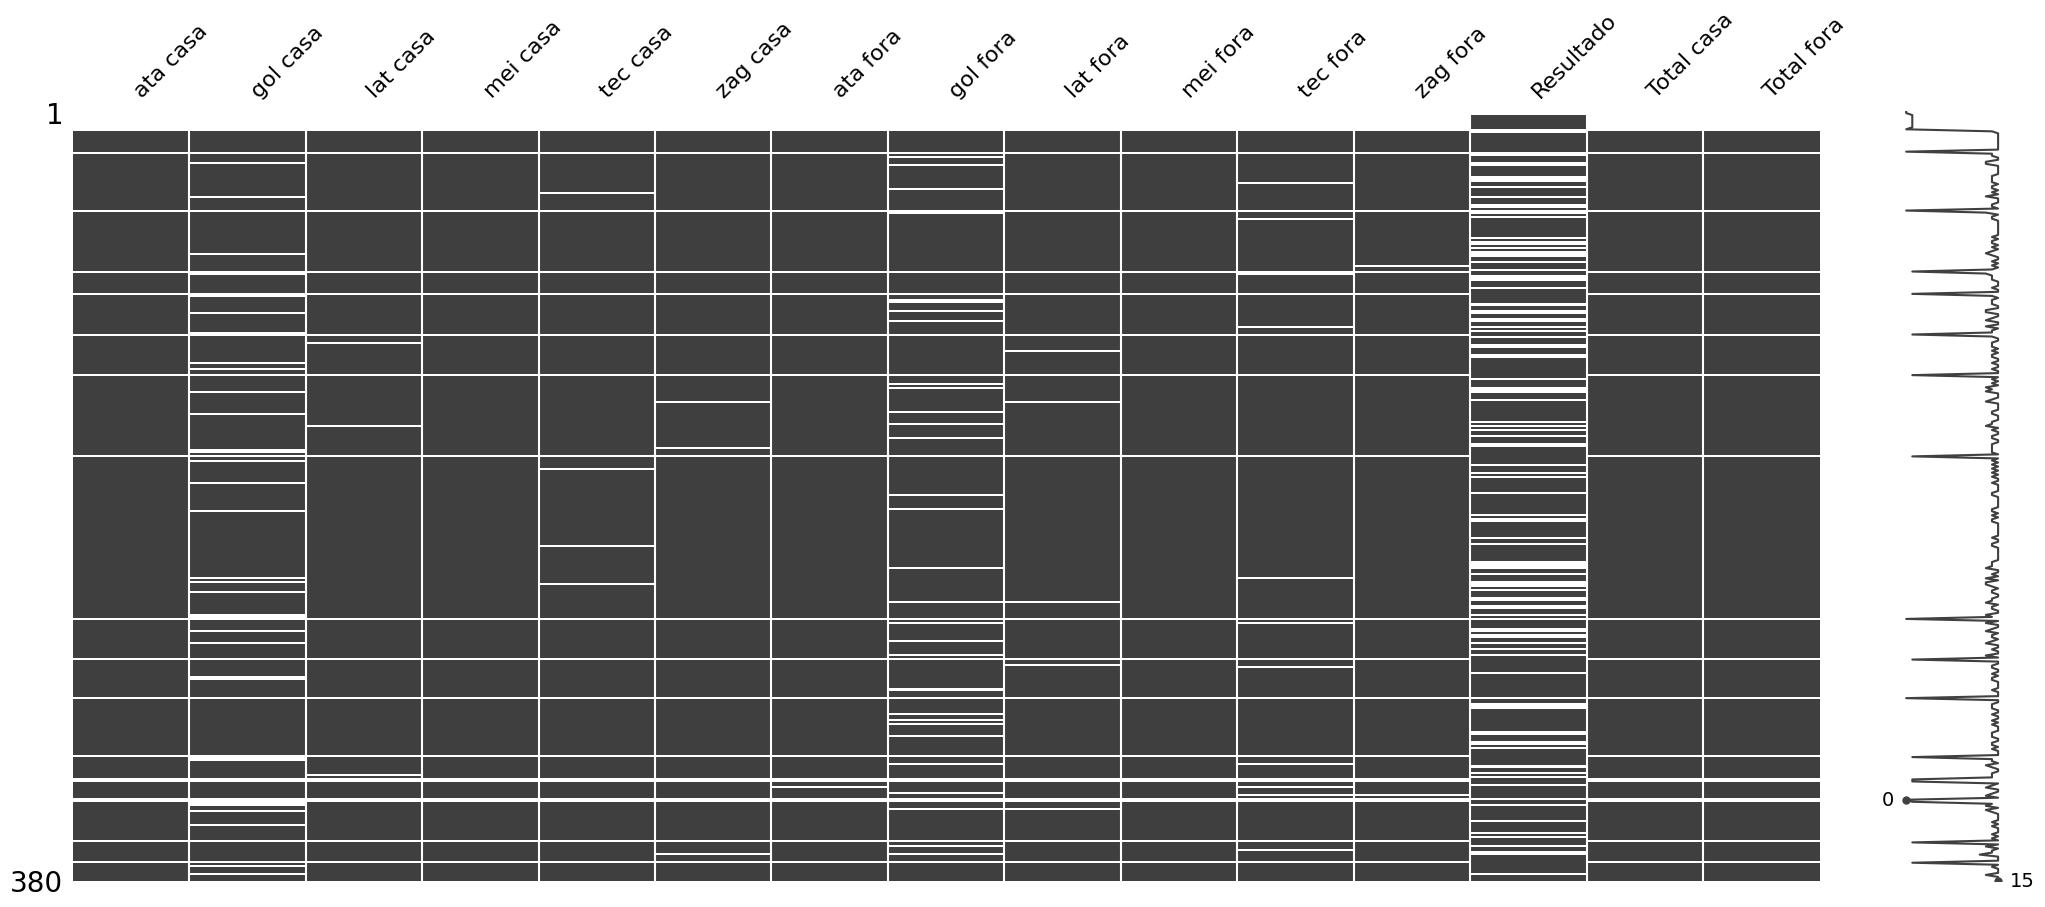

In [ ]:
# substituindo os zeros por NaN
dfjogos_NaN.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dfjogos_NaN)

Vamos agora excluir os jogos da rodada 1 e os jogos que não fizeram pontução para o Cartola. Assim estaremos excluindo todas as 27 linhas em que todas as posições possuem valor zero, para isso utilizaremos o campo Total casa.

<Axes: >

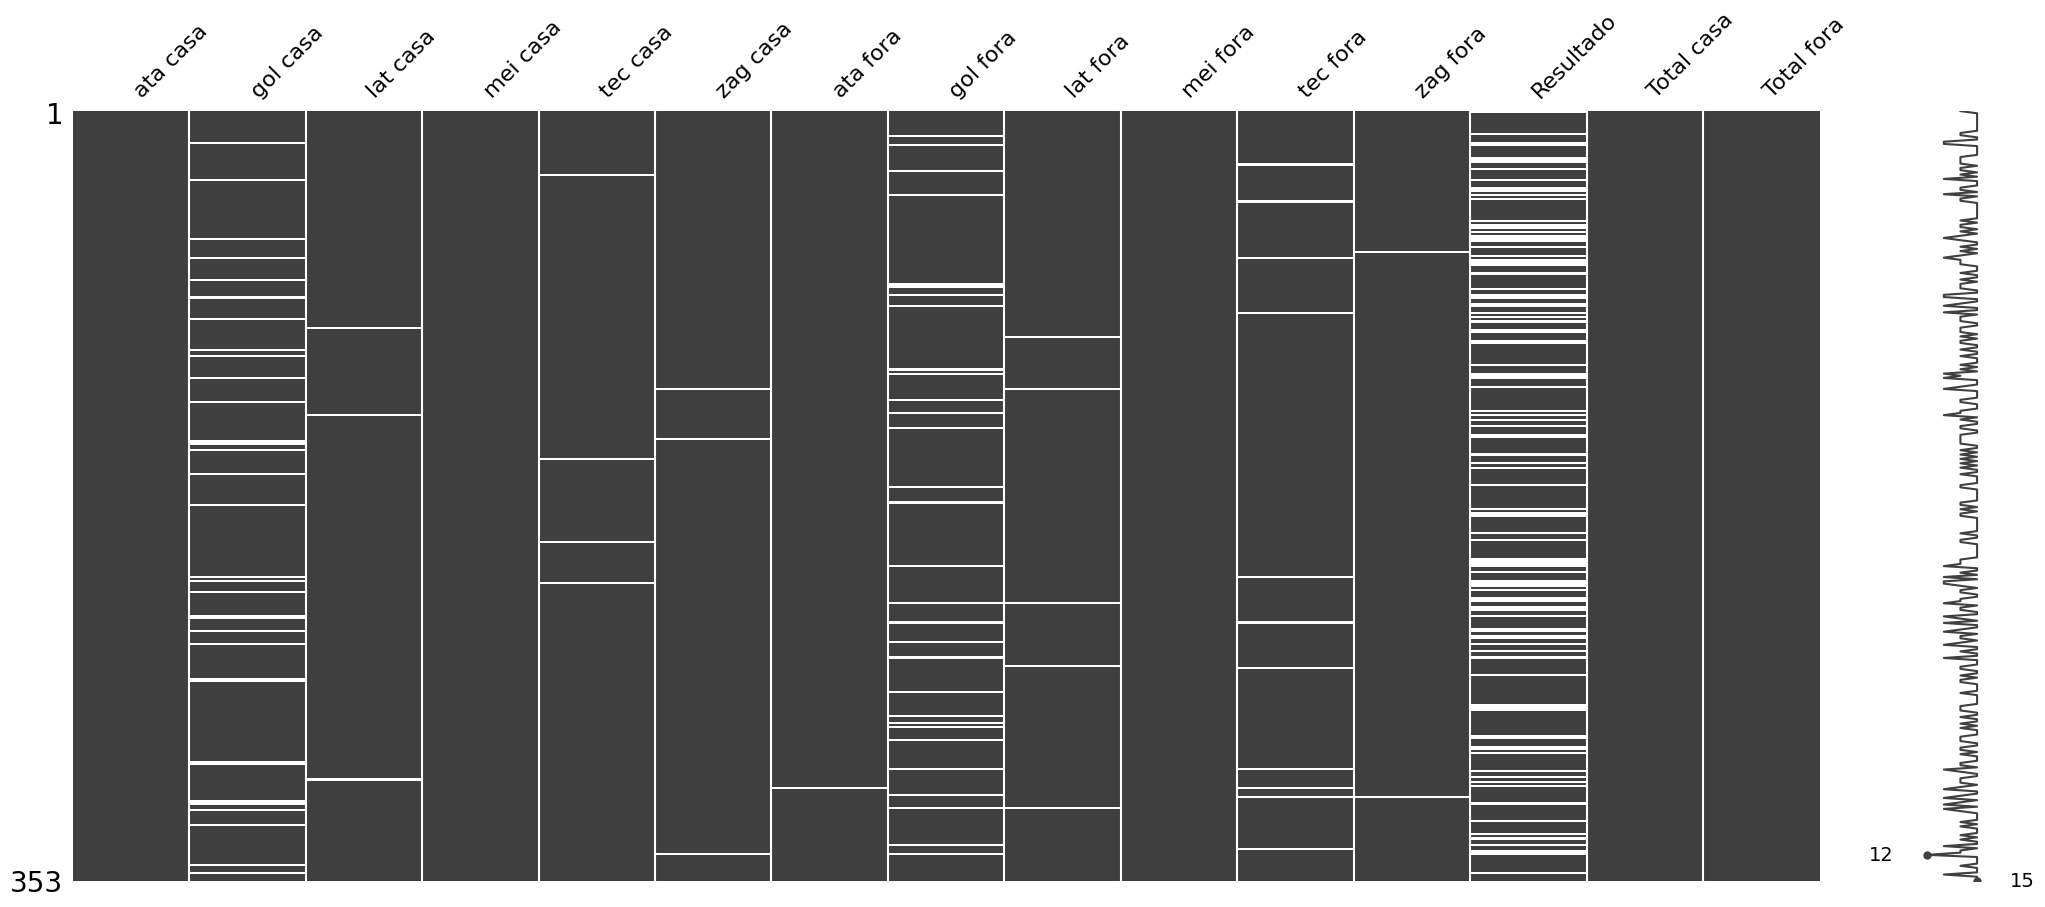

In [ ]:
# Excluindo as linhas com NaN de 'Total casa'

dfjogos_NaN = dfjogos_NaN.dropna(subset=['Total casa'])

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dfjogos_NaN)

Podemos verificar que as colunas Total casa e Total fora não possuem nenhum valor NaN. Para as demais posições, consideramos que o valor zero é adequado e reflete a pontuação feita pelos jogadores. 

<Axes: >

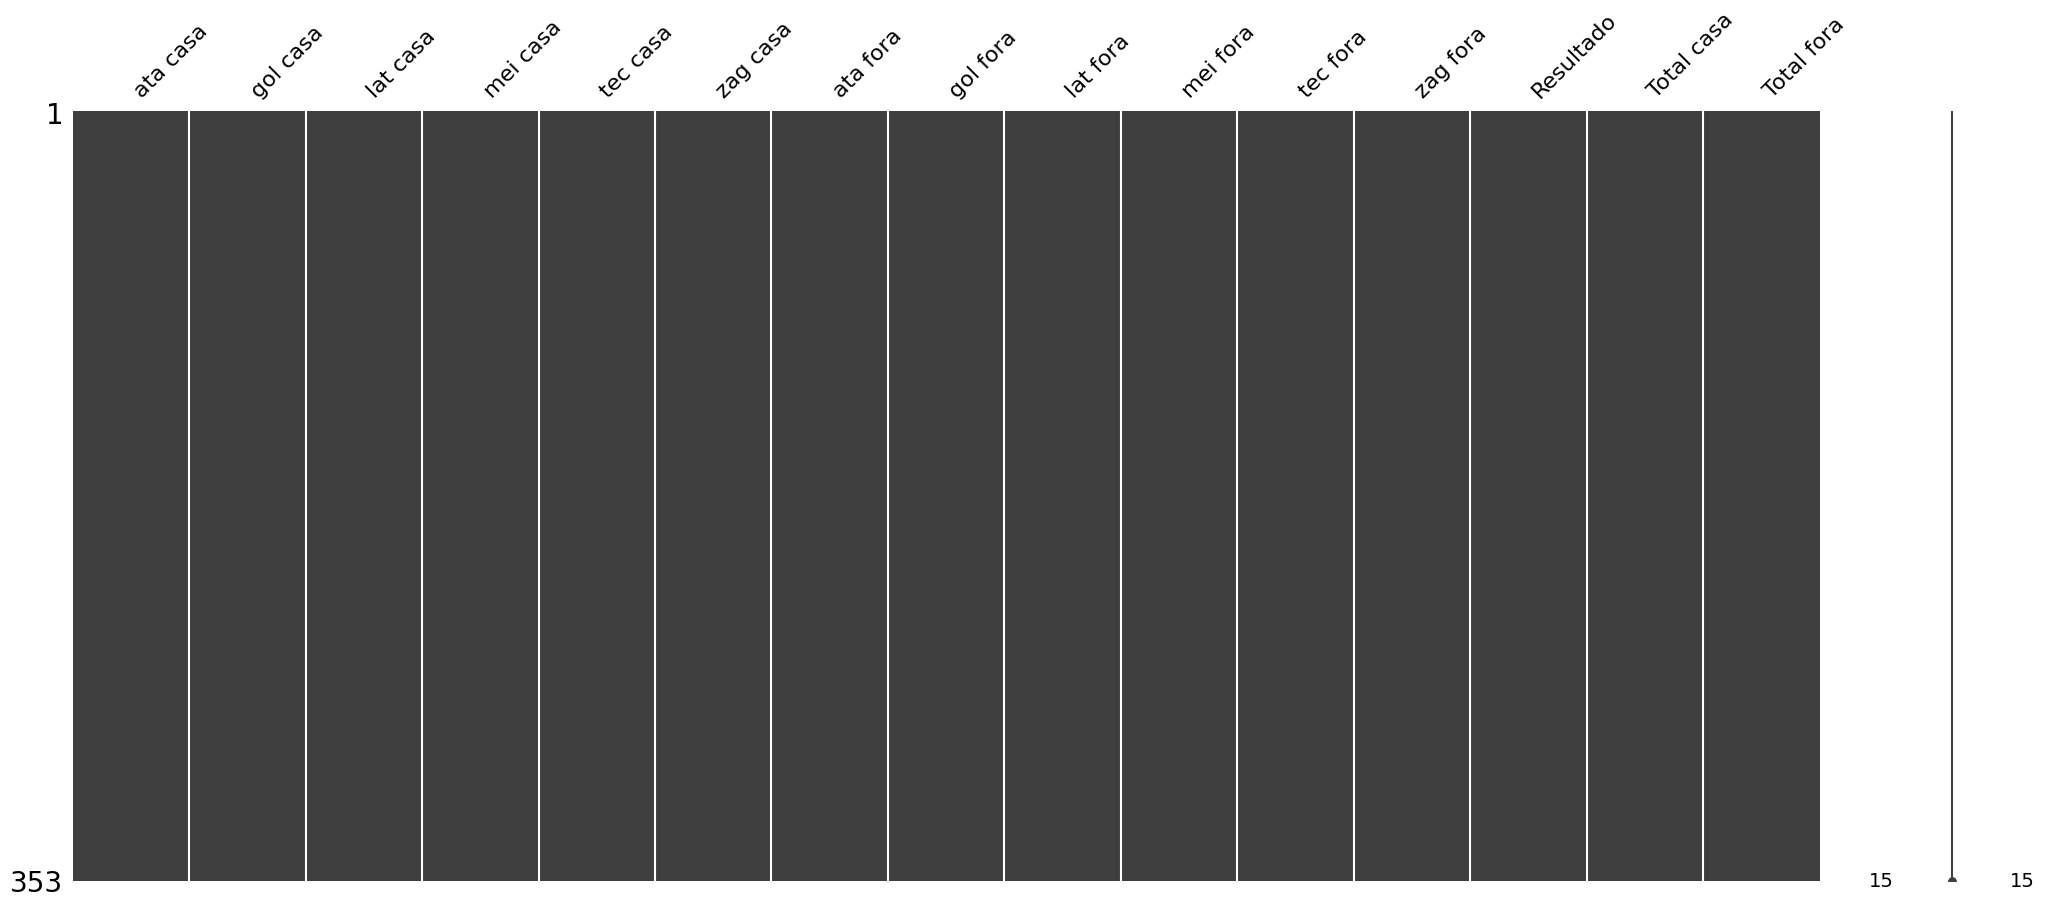

In [ ]:
# Substituindo os valores NaN por zero
dfjogos_NaN = dfjogos_NaN.fillna(0)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dfjogos_NaN)

In [ ]:
# Excluindo as Colunas Total casa e Total fora
dfjogos_NaN = dfjogos_NaN.drop(['Total casa', 'Total fora'], axis=1)

# Guardando o novo dataset para testes futuros
dfjogos_final = dfjogos_NaN

# exibindo as primeiras linhas
dfjogos_final.head()

ata casa  gol casa  lat casa  mei casa  tec casa  zag casa  ata fora  \
10       8.8       3.0      -1.4      12.5      2.77       7.6      18.4   
11      38.7       3.0       3.1      10.8      6.46      15.5       2.9   
12      27.7      11.0      27.9       8.1      7.95      12.7      18.7   
13       5.5       2.0       0.3      10.5      1.84       1.9       9.5   
14      20.3       4.0       7.4       3.4      4.22      11.3      16.8   

    gol fora  lat fora  mei fora  tec fora  zag fora  Resultado  
10       5.0       7.3       7.1      4.26       9.1        0.0  
11       1.0      10.4      16.0      3.45       7.6        1.0  
12      -2.0       1.0      13.7      3.38       5.8        1.0  
13       6.0      18.5       7.0      4.90      12.9       -1.0  
14       4.0       5.9       8.4      3.52       3.6        1.0

#### **4.1.3 Transformações numéricas**

Vamos trazer novamente um resumo estatístico de nosso dataset.

In [ ]:
# Faz um resumo estatístico do dataset dfjogos (média, desvio padrão, mínimo, máximo e os quartis)
dfjogos_final.describe()

ata casa    gol casa    lat casa    mei casa    tec casa    zag casa  \
count  353.000000  353.000000  353.000000  353.000000  353.000000  353.000000   
mean    14.871388    3.832578    9.855241   15.171388    4.628782    7.900283   
std     10.114549    3.727712    8.711332    8.916434    2.188971    7.288146   
min     -2.800000   -3.000000   -2.500000   -1.500000   -0.080000   -5.800000   
25%      7.700000    1.000000    3.000000    8.900000    2.930000    1.900000   
50%     12.900000    3.000000    7.100000   13.600000    4.350000    6.000000   
75%     19.200000    7.000000   16.000000   20.200000    6.040000   13.700000   
max     54.200000   15.500000   37.300000   53.000000   11.120000   30.500000   

         ata fora    gol fora    lat fora    mei fora    tec fora    zag fora  \
count  353.000000  353.000000  353.000000  353.000000  353.000000  353.000000   
mean    11.862606    3.594618    7.301983   11.983853    3.617875    5.981586   
std      8.444630    3.926968    7.219266    7.360351    1.898447    6.689134   
min     -3.500000   -4.000000   -6.600000   -1.500000    0.000000   -5.300000   
25%      5.700000    1.000000    2.100000    7.000000    2.240000    0.900000   
50%     10.200000    2.000000    5.000000   10.600000    3.400000    4.000000   
75%     16.100000    6.000000   11.200000   16.000000    4.760000    9.800000   
max     44.300000   19.000000   34.100000   47.800000    9.930000   37.700000   

        Resultado  
count  353.000000  
mean     0.178470  
std      0.828739  
min     -1.000000  
25%     -1.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

Quando olhamos a tabela fica mais fácil observar se existe discrepância entre os valores. Não vimos muitas discrepância entre os valores, principalmente os mínimos, máximos e a média. 

Mesmo iremos fazer um teste aplicando a Normalização e a Padronização. Mas para isso antes iremos salvar uma cópia de nosso dataset que agora será chamado **dfjogos_padronizado**.

In [ ]:
# Guardando o novo dataset para testes futuros com Padronização
dfjogos_padronizado = dfjogos_final

A Padronização e a Normalização devem apenas ser aplicadas aos valores dos nossos atributos previsores. Por isso vamos separar os valores em componentes de input (X) e output (Y).

In [ ]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = dfjogos_padronizado.values[:,0:12]
Y = dfjogos_padronizado.values[:,12]

**Padronização**

Se um atributo tem uma variância na uma ordem de grandeza maior do que outras, ela pode dominar todo o processo e tornar o projeto incapaz de aprender com as outras características corretamente.

Resumindo, o modelo pode colocar mais peso nas variáveis que possuem maior escala e acabar desconsiderando variáveis com menor escala, mas que sejam igualmente ou mais importantes

O objetivo da Padronizaão é colocar todos os nossos recursos em escalas próximas para que o modelo entenda cada um deles como igualmente importantes.




In [ ]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n",dfjogos_padronizado.values)
print("\nDados Padronizados (não inclui a coluna Resultado): \n\n", rescaledX)

Dados Originais: 

 [[ 8.8   3.   -1.4  ...  4.26  9.1   0.  ]
 [38.7   3.    3.1  ...  3.45  7.6   1.  ]
 [27.7  11.   27.9  ...  3.38  5.8   1.  ]
 ...
 [ 9.2   5.    4.2  ...  5.83 12.7  -1.  ]
 [ 2.2   2.    6.   ...  7.31  5.   -1.  ]
 [32.4   7.5  10.3  ...  2.3   2.2   1.  ]]

Dados Padronizados (não inclui a coluna Resultado): 

 [[-0.60111492 -0.22366525 -1.29385687 ... -0.66447715  0.338717
   0.46685264]
 [ 2.35921901 -0.22366525 -0.7765551  ...  0.54642068 -0.08855327
   0.24229007]
 [ 1.27013295  1.92546937  2.07435239 ...  0.23349203 -0.12547786
  -0.02718501]
 ...
 [-0.56151179  0.31361841 -0.65010356 ...  0.16546406  1.16688283
   1.0058028 ]
 [-1.25456656 -0.49230708 -0.44318286 ... -0.21549256  1.94757418
  -0.14695171]
 [ 1.73546972  0.98522297  0.05112772 ... -0.63726596 -0.69517155
  -0.56613517]]


**Normalização**


A normalização nada mais é do que colocarmos a média muito próxima a zero e do desvio padrão muito próxima a 1. Antes de efetuar a Normalização dos dados, vamos fazer outra cópia de nosso data set, para fins de teste, que agora será chamada **dfjogos_normalizado**.

In [ ]:
# Guardando o novo dataset para testes futuros com Normalização
dfjogos_normalizado = dfjogos_final

# Separando os valores do dataset em componentes de input (X) e output (Y)
X = dfjogos_normalizado.values[:,0:12]
Y = dfjogos_normalizado.values[:,12]

In [ ]:
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n",dfjogos_normalizado.values)
print("\nDados Normalizados (não inclui a coluna Resultado): \n\n", rescaledX)

Dados Originais: 

 [[ 8.8   3.   -1.4  ...  4.26  9.1   0.  ]
 [38.7   3.    3.1  ...  3.45  7.6   1.  ]
 [27.7  11.   27.9  ...  3.38  5.8   1.  ]
 ...
 [ 9.2   5.    4.2  ...  5.83 12.7  -1.  ]
 [ 2.2   2.    6.   ...  7.31  5.   -1.  ]
 [32.4   7.5  10.3  ...  2.3   2.2   1.  ]]

Dados Normalizados (não inclui a coluna Resultado): 

 [[0.20350877 0.32432432 0.02763819 ... 0.17444219 0.42900302 0.33488372]
 [0.72807018 0.32432432 0.14070352 ... 0.35496957 0.34743202 0.3       ]
 [0.53508772 0.75675676 0.7638191  ... 0.30831643 0.34038268 0.25813953]
 ...
 [0.21052632 0.43243243 0.16834171 ... 0.29817444 0.58710977 0.41860465]
 [0.0877193  0.27027027 0.21356784 ... 0.24137931 0.73615307 0.23953488]
 [0.61754386 0.56756757 0.32160804 ... 0.17849899 0.23162135 0.1744186 ]]


#### **4.1.4 Transformações categóricas**

Não houve necessidade de efetuar transformações categóricas no nosso dataset.

### 4.2. Separação em conjunto de treino e conjunto de teste

Iremos agora separar nosso conjunto de treino e o conjunto de teste. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split. 

Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 11) e qual é a coluna das classes (Y - 12). 

Em seguida, especificaremos o tamanho do conjunto de teste desejado. Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

Faremos isso para os nossos três datasets selecionados anterioemente:


*   dfjogos_final (dataset original)
*   dfjogos_padronizado (dataset padronizado)
*   dfjogos_normalizado (dataset normalizado)



In [ ]:
# Seleção para cada dataset (dataset original: dfjogos_final)

test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste
array = dfjogos_final.values
x = array[:,0:12]
y = array[:,12]
#x_train, x_test, y_train, y_test = train_test_split(x, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:
# Seleção para cada dataset (dataset padronizado: dfjogos_padronizado)

test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste
array = dfjogos_padronizado.values
x = array[:,0:12]
y = array[:,12]
#x_train, x_test, y_train, y_test = train_test_split(x, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:
# Seleção para cada dataset (dataset normalizado: dfjogos_normalizado)

test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste
array = dfjogos_normalizado.values
x = array[:,0:12]
y = array[:,12]
#x_train, x_test, y_train, y_test = train_test_split(x, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação